# 复杂度分析

## 迭代与递归

### 迭代

In [13]:
# 迭代
def for_loop(n: int) -> int:
    result = 0
    for i in range(1, n + 1):
        result += i
    return result

for_loop(1024)

524800

### 递归

In [6]:
# 递归
# 递: 程序不断条用自身
# 归: 达到终止条件后, 归并所有操作
# 触发终止调节前, 存在n个未返回的递归函数, 递归深度为 n
def recur(n: int) -> int:
    if n == 1:
        return 1
    res = recur(n - 1)
    return n + res

recur(1024)

524800

迭代与递归和数学中的数列递推式关系极深  
a_1 = 1  
a_n = f[a_(n - 1)]  
迭代: 自下而上接近问题, 从 a_1 一步一步得到最终值  
递归: 自上而下解决问题, 从 a_n 开始, 按照递推式拆解(递), 拆解完毕后一次性求和(归)

由于 调用栈 的存在, 递归比迭代更加耗费资源, 无论是时间(调用操作)还是空间(调用栈)

### 尾递归

In [11]:
# 尾递归(tail recursion)
# 如果函数在 返回前最后一步 才进行递归调用, 则其可被编译器或解释器优化
# 避免了过多的调用栈
# 注: Python, Java不支持尾递归

# 在这里避免过多调用栈的方式是把加法操作放在了递的过程中
# 与循环类似, 只不过带着一个需要向下处理的未知量
def tail_recur(n):
    if n == 1:
        return 1
    return tail_recur(n - 1) + n
tail_recur(1024)

524800

### 递归树

In [17]:
# 分治: 大问题拆为多个小问题(分), 递归地解决小问题(治)
# 处理分治问题时, 递归比循环更加直观
# 普通递归是一条线, 递归树是一棵树

# 以斐波那契数列为例
# a_1 = 0
# a_2 = 1
# a_n = a_(n - 1) + a_(n - 2)

def fib(n: int) -> int:
    if n == 1:
        return 0
    if n == 2:
        return 1
    return fib(n - 1) + fib(n - 2)

fib(10)

34

很多情况下递归和迭代可以相互转换, 其关键就是在于是否有 自上而下 或 自下而上 的解决方法  
对于简单问题来说, 这两种方法都是很直观的, 但对于复杂问题, 通常只有一种方法易于得出.  
因此, 选择递归还是迭代取决于具体问题

## 时间复杂度

时间复杂度统计的是时间的增长趋势, 而非具体时间.  
其使得时间统计可以独立于平台和环境.  
但其存在一定的局限性, 即由于具体操作不同, 具体时间也不同.  
对于同样复杂度的算法, 或者数据量小时. 该比较方法无效. 需要实际运行来判断好坏.  
但由于其为增长趋势, 在数据量无穷大时, 更优的复杂度一定更好.

Big-O Notation 表示 渐进上界

记操作次数 T(n) = 3 + 2n (3次固定操作 + 2倍于n的操作)  
O(T(n)) = O(n)  

严格定义(下界则是把 <= 换为 >=):  
若存在正实数c和n_0, 使得对于所有的 n >= n_0, 有:  
    f(n) <= c * g(n)  
则称 f(n) = O(g(n)), g(n) 是 f(n) 的渐进上界

n_0 -> 起始点  

注: 只需记好 复杂度 = 趋势 即可!

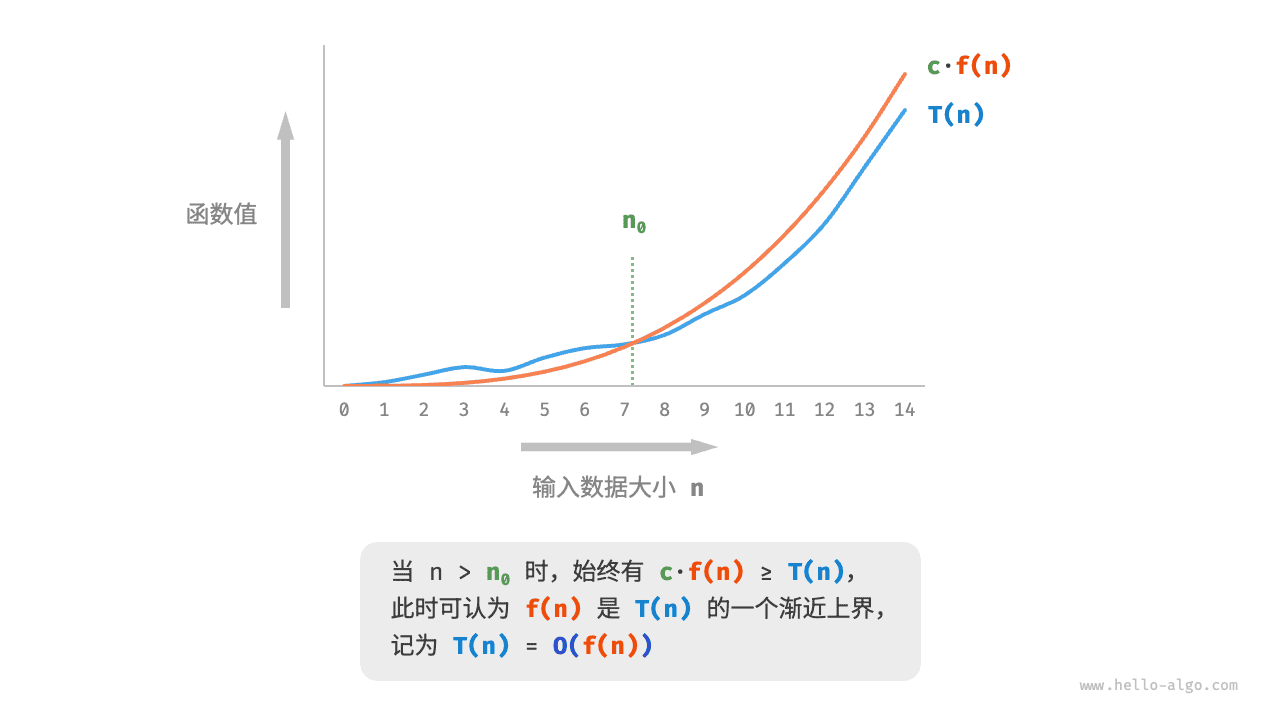

### 时间复杂度的推算方法

In [ ]:
# 由于常数项和系数以及低阶项不影响最终结果, 只需要找最高阶即可
# 一般高阶项在嵌套循环处
# 如这里为 O(n^2)
def algorithm(n: int):
    a = 1
    a = a + n
    
    for i in range(5 * n + 1):
        print(0)
        
    for i in range(2 * n):
        for j in range(n + 1):
            print(0)

常见复杂度类型  
实际就是无穷小的比较

常数阶 < 对数阶 < 线性阶 < 线性对数阶 < 平方阶 < 指数阶 < 阶乘阶  
O(1) < O(log n) < O(n) < O(nlog n) < O(n^2) < O(2^n) < O(n!)

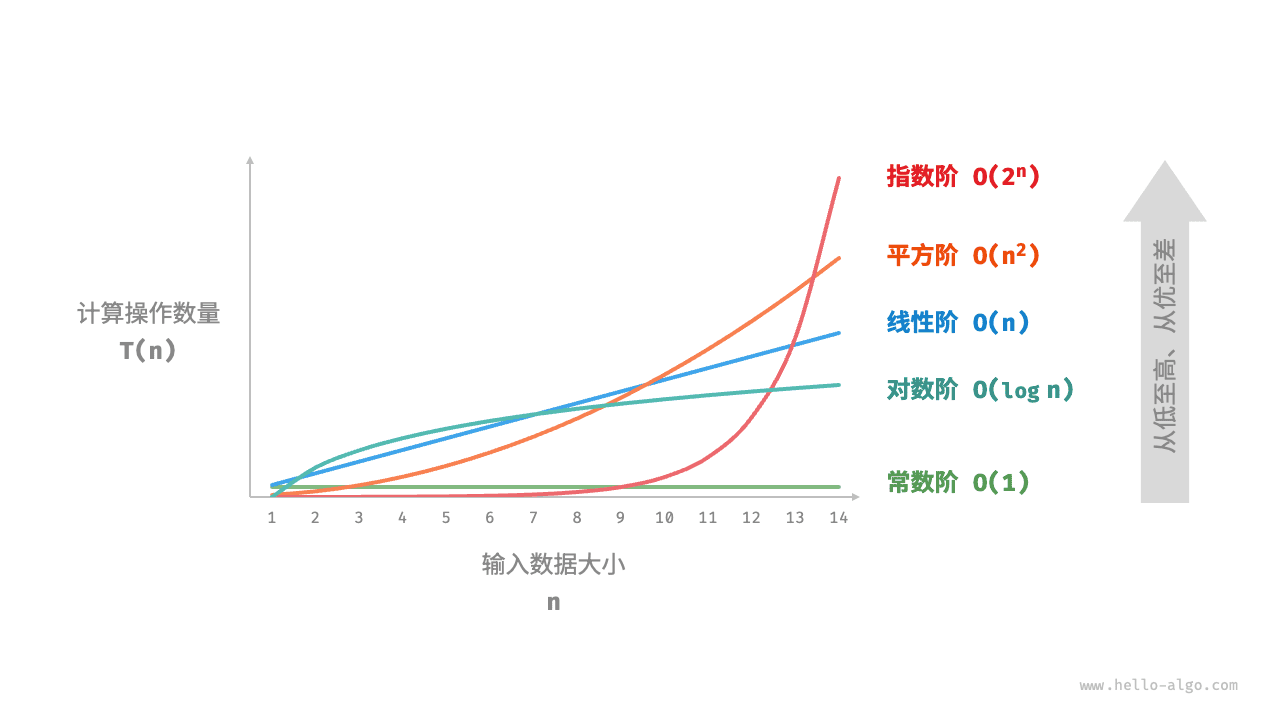

#### O(2^n)

O(2^n) 通常出现在递归树中, 类似于细胞分裂  
由于指数增长极快(指数爆炸), 对大规模问题是不可接受的

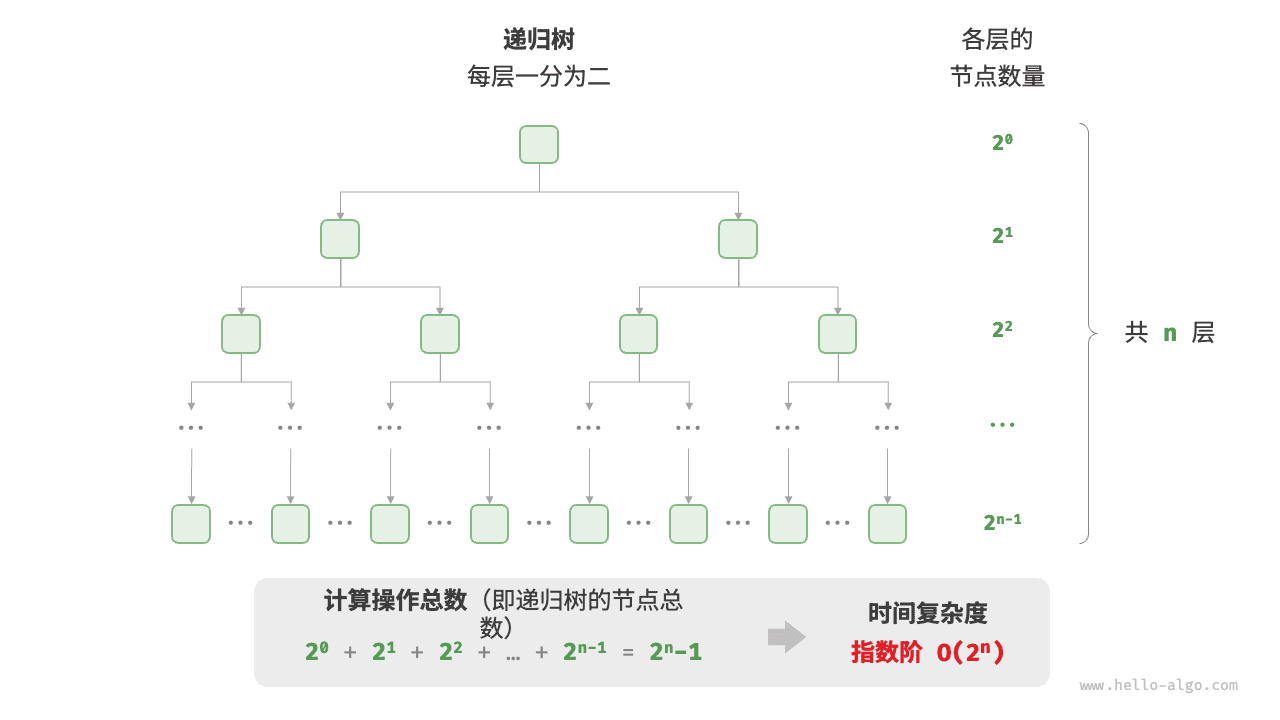

In [20]:
def fib(n: int) -> int:
    if n == 1:
        return 0
    if n == 2:
        return 1
    return fib(n - 1) + fib(n - 2)

fib(10)

34

#### O(log n)

对数阶 -> 每轮减半 -> 二分法  
常出现在分治策略中. 是仅次于常数阶的理想复杂度  

底数可以在不影响复杂度的前提下转换, 因此常常忽略底数  
O(log_m n) = O(log_k n / log_k m) = O(log_k n)
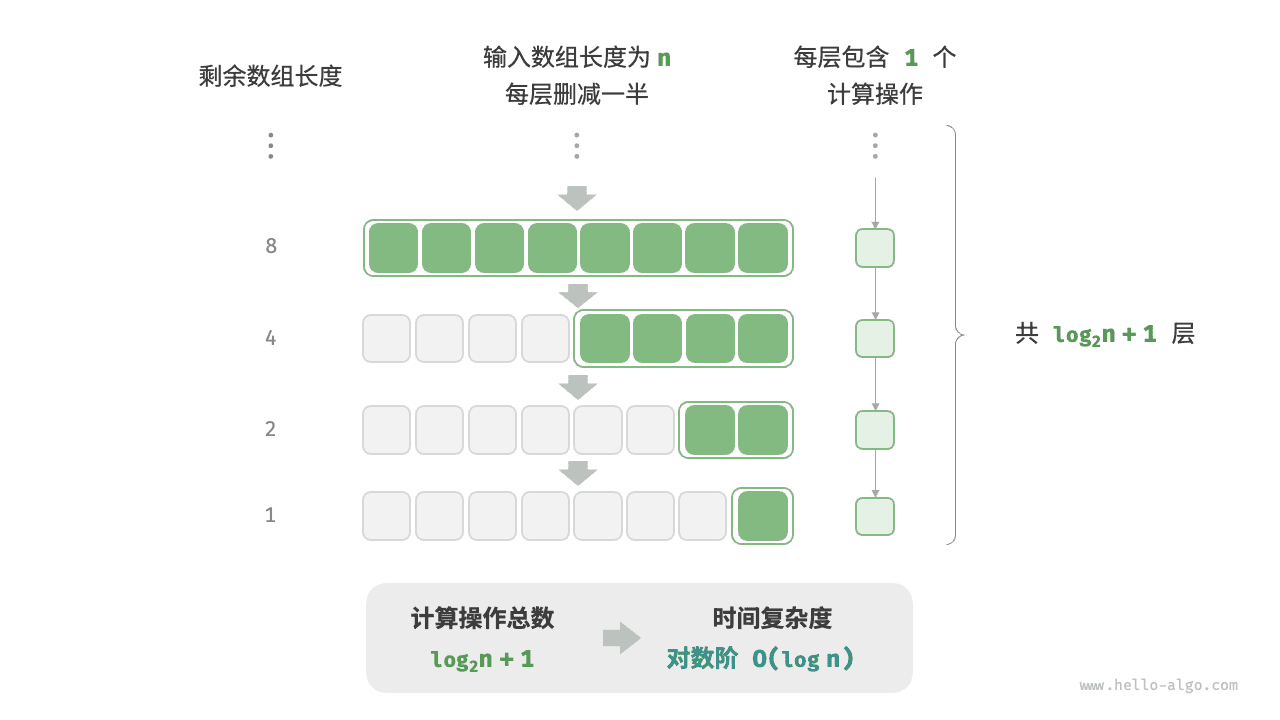

In [7]:
# 迭代
def logarithmic(n: int) -> int:
    count = 0
    while n > 1:
        n = n // 2
        count += 1
    return count

logarithmic(10)

3

In [5]:
# 递归
def log_recur(n: int) -> int:
    if n == 0:
        return -1
    return log_recur(n // 2) + 1

log_recur(10)

3

#### O(nlog n)

线性对数阶常出现于嵌套循环中, 两层循环的复杂度分别为 O(n) 和 O(log n)  
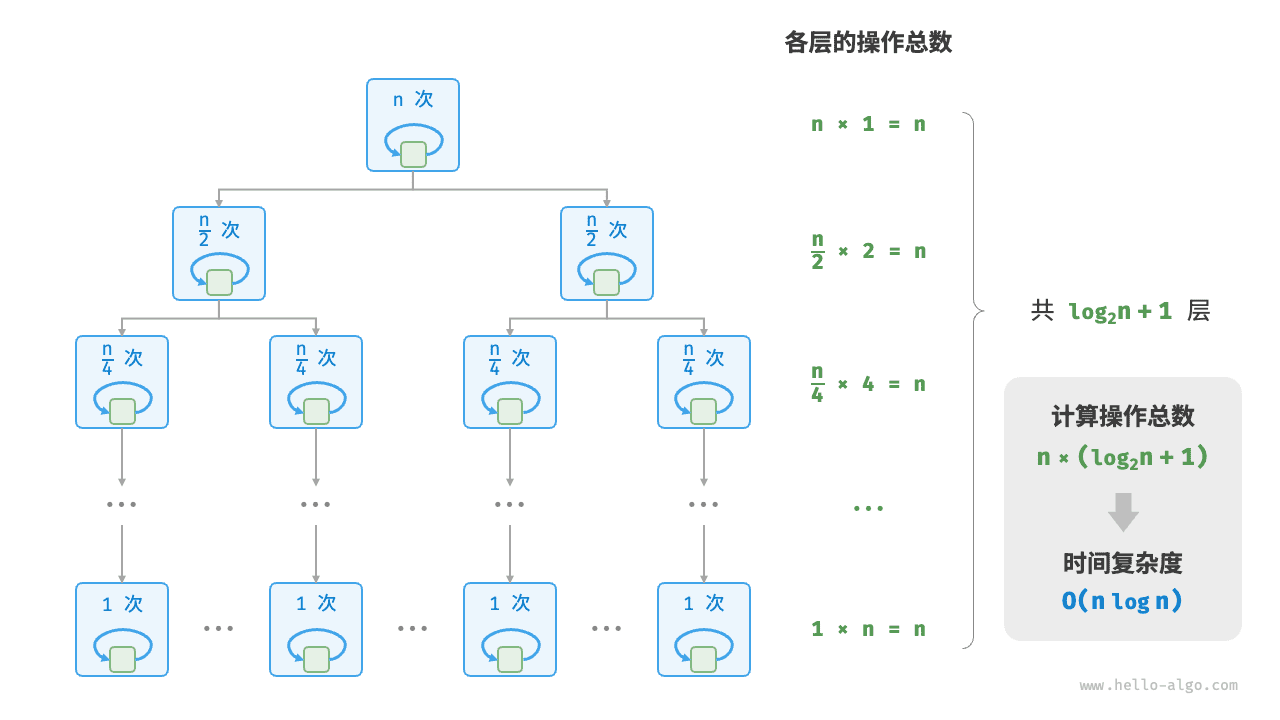

In [8]:
def linear_log(n: int) -> int:
    count = 0
    for i in range(n):
        tmp = n
        while tmp > 1:
            tmp //= 2
            count += 1
    return count

linear_log(10)

30

#### O(n!)

阶乘阶对应全排列问题, 通常使用递归实现  
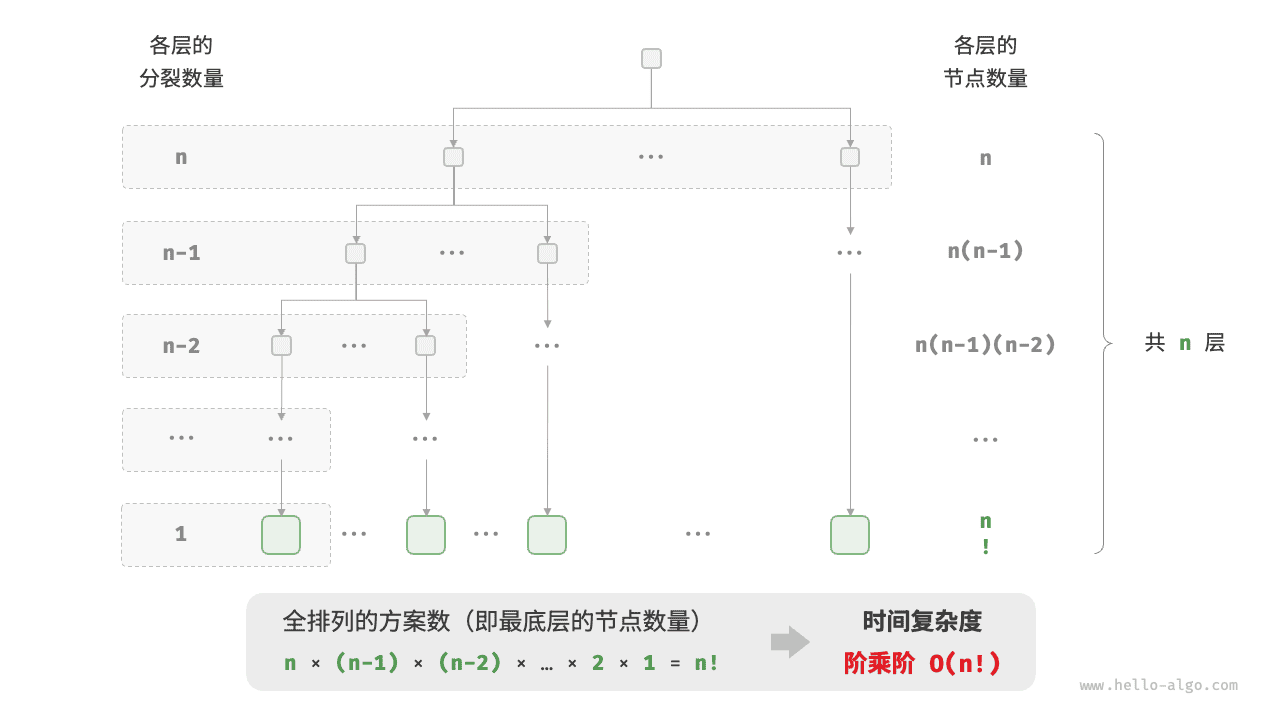

In [13]:
def factorial(n: int) -> int:
    if n == 1:
        return 1
    count = 0
    for _ in range(n):
        count += factorial(n - 1)
    return count

factorial_recur(10)

3628800

### 最差、最佳、平均时间复杂度

算法的时间效率不是固定的, 而是与输入数据的分布有关.  
假设在一个不重复的数组中寻找 1  

nums = [?, ?, ?, ?, 1] 时需要遍历整个数组, 达到最差时间复杂度 O(n)  
nums = [1, ?, ?, ?, ?] 时不需要遍历整个数组, 达到最佳时间复杂度 Ω(1) Omega  
nums = [1, ?, 1, ?, ?] 时需要遍历半个数组, 当输入数据均匀分布时, 达到平均复杂度 Θ(n / 2) = Θ(n) Theta  

虽然平均复杂度可以体现算法在随机输入下的运行效率, 但最差复杂度却更加常用:  
1. 最差复杂度给出了效率安全值
2. 对应复杂的算法平均复杂度难以计算

平均复杂度有时候也记作 O(n), 但这种写法不规范


## 空间复杂度

空间复杂度(space complexity) 用于衡量算法占用内存随数据量变化的变化趋势  

算法运行过程使用的空间包含三种:  
1. 输入空间
2. 暂存空间
3. 输出空间
一般情况下空间复杂度统计的范围是 暂存空间 和 输出空间

暂存空间可分为三部分:
1. 暂存数据
2. 栈帧空间

所以, 在分析空间复杂度时, 通常统计 暂存数据 栈帧空间 和 输出空间 三部分.  

由于内存为硬性要求, 需要保证在所有输入下都有足够的内存空间预留, 因此只统计最差情况.  

并且, 最差有两种含义:
1. 以最差输入数据为准
2. 以运行时峰值内存为准

递归需要注意栈帧空间, 如线性递归占用 O(n) 的栈帧空间

常见类型:  
O(1) < O(log n) < O(n) < O(n^2) < O(2^n)  
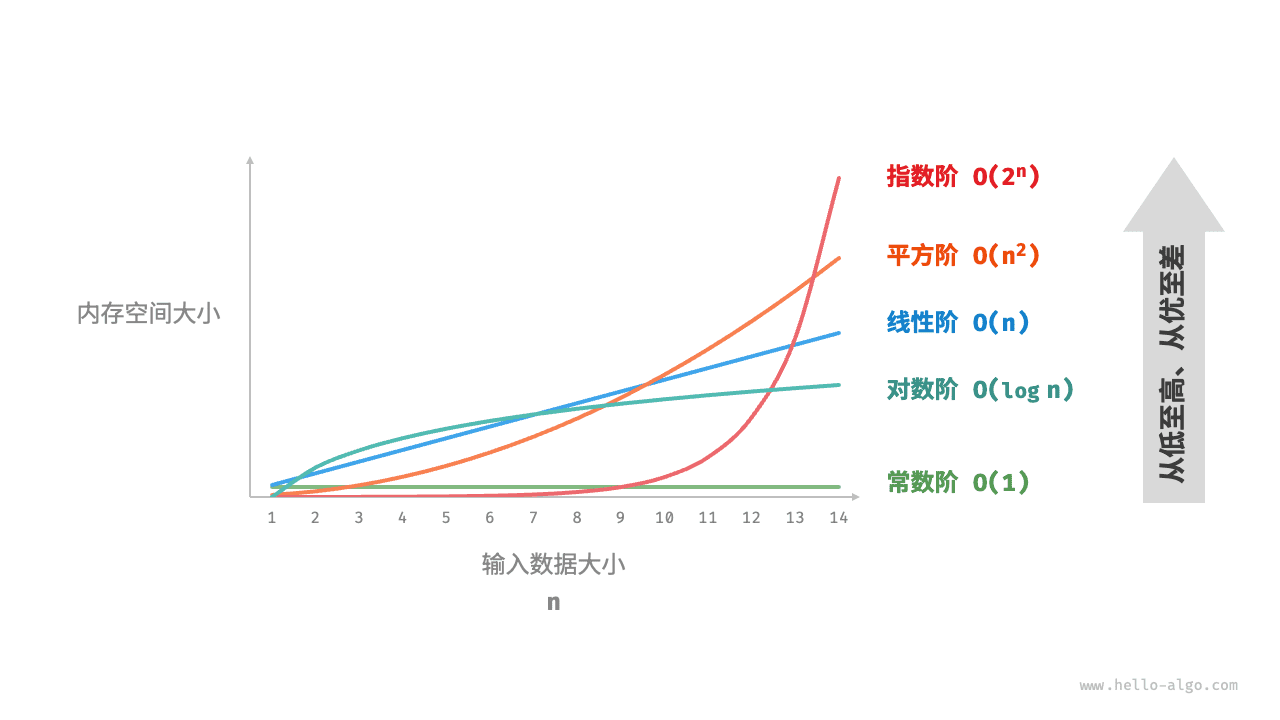

#### O(2^n)

常见于二叉树  
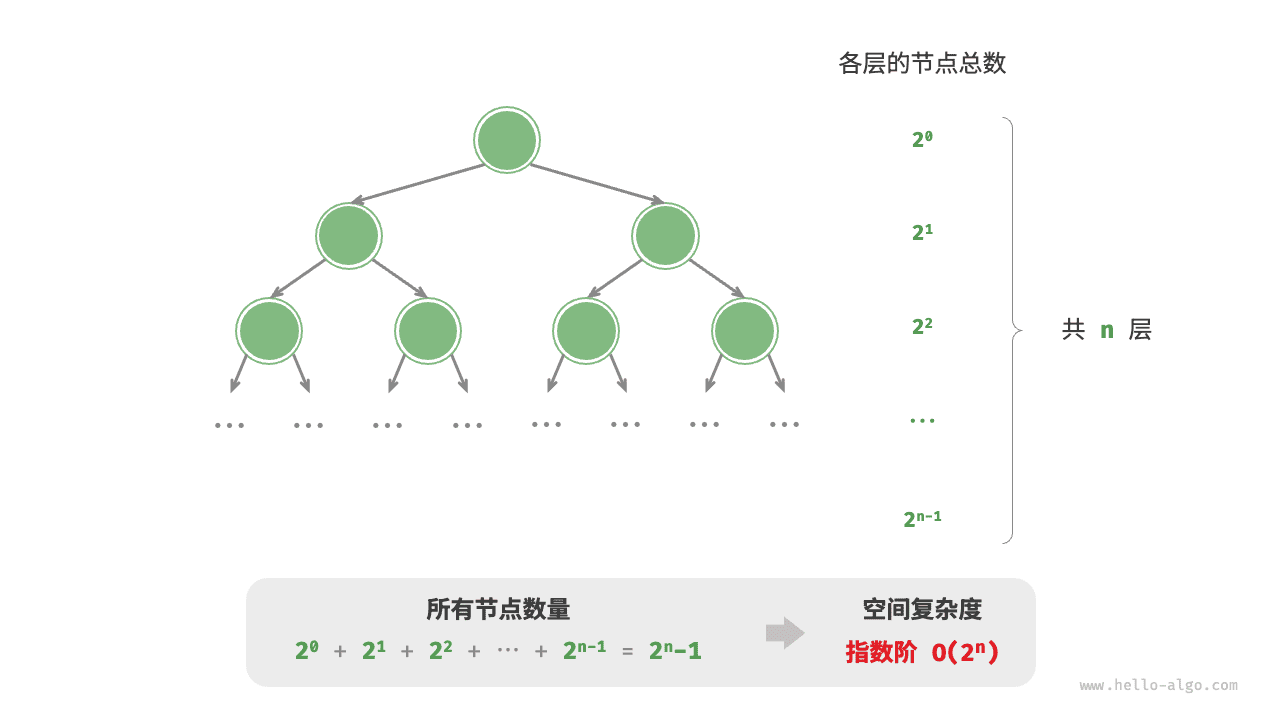

#### O(log n)

常见于分治算法, 形成高度为 log n 的递归树的栈帧空间

## 权衡时间与空间

理想条件下我们希望两者都达到最优, 但这种条件难以达到.  
时间复杂度和空间复杂度通常是成反比的, 因此需要根据具体问题来分析.  
通常情况下, 时间比空间更加宝贵.

# 数据结构

值得注意的是, 数据结构提供的是数据的组织方式

## 数据结构的分类

### 逻辑结构

逻辑结构分为两种:
1. 线性结构(一对一)
2. 非线性结构(一对多, 多对多)
非线性结构也分为两种:
1. 树形结构(一对一)
2. 网状结构(多对多)

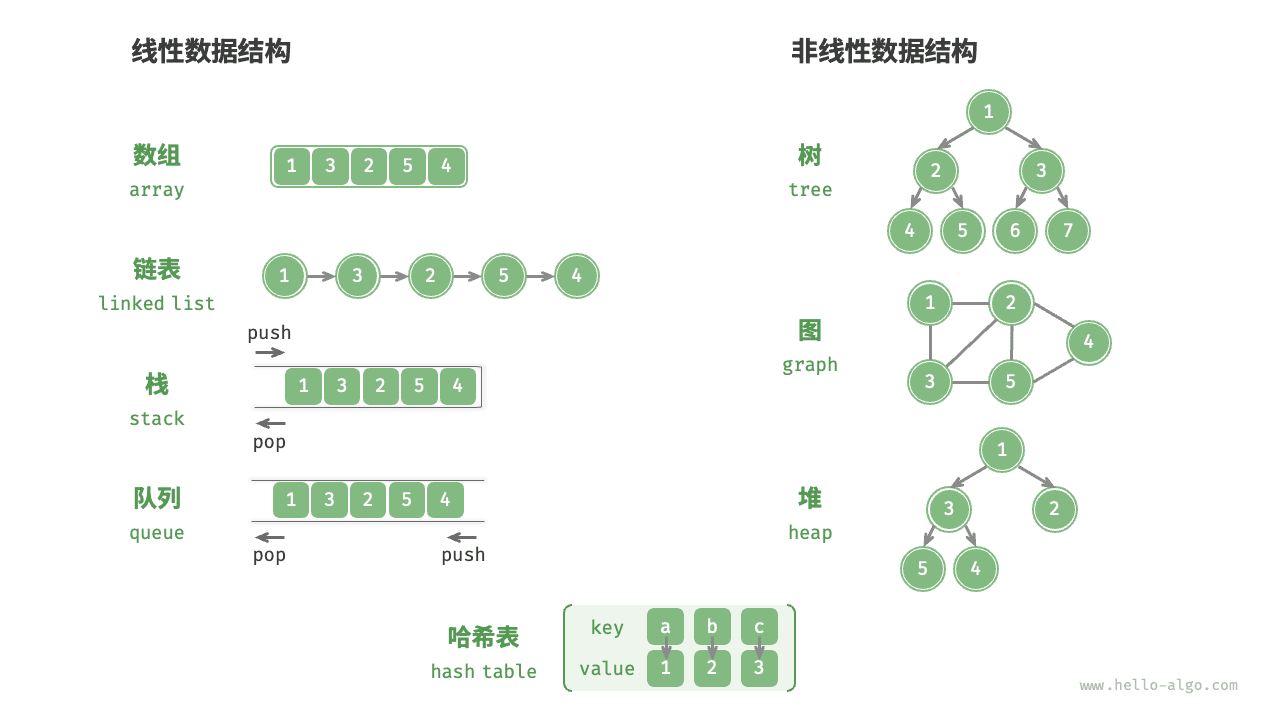

### 物理结构

物理结构反映了数据在内存中的存储方式
物理结构分为两种:
1. 连续空间存储(数组)
2. 离散空间存储(链表)

值得注意的是, 所有数据结构都是基于这两种结构实现的  
也就是所谓的 一生二, 二生三, 三生万物

## 数字编码

所有的整数类型能表示的负数都比正数多一个, 这是由于数字编码的原因  
数字编码共三种:
1. 原码: 将二进制最高位视为符号位(0表整数, 1表负数), 其余位表数值
2. 反码: 正数的反码与其原码相同, 负数的反码是对其原码除符号位外所有位取反
3. 补码: 整数的补码与原码相同, 负数的补码是在反码的基础上加1

需要指出的是, 数字是以 补码 的形式存储于计算机中的  
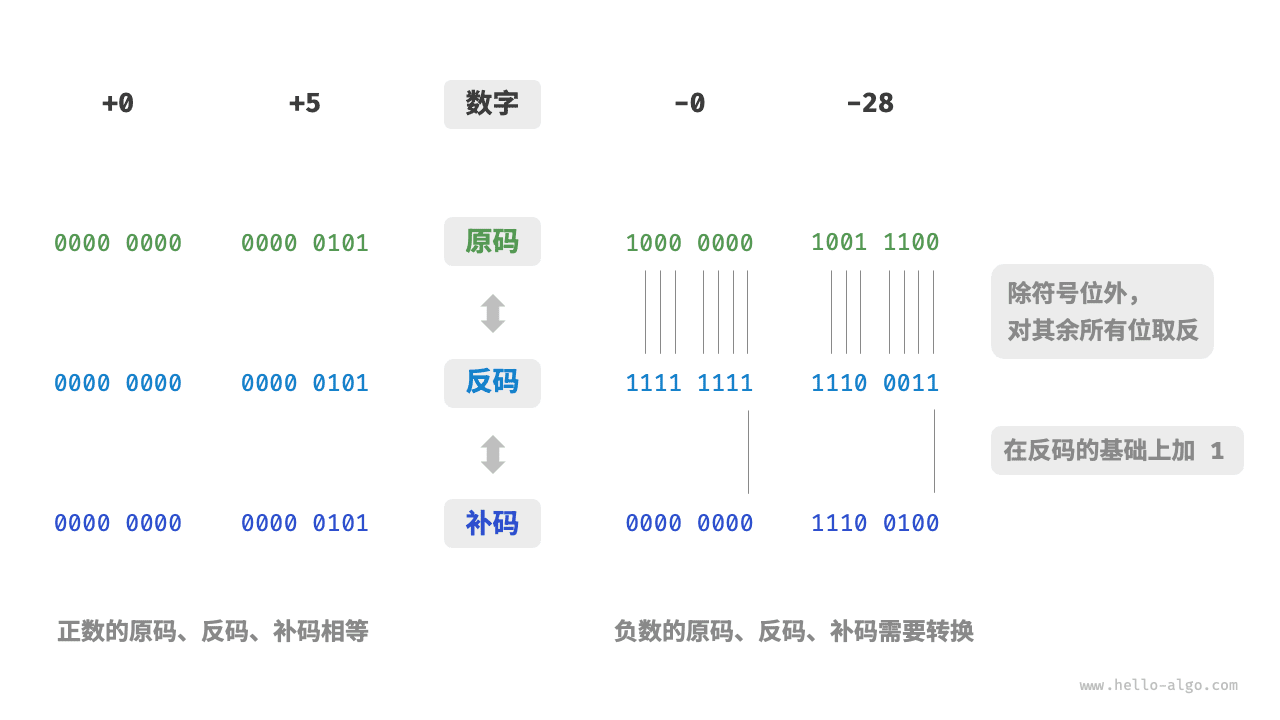

#### 原码(sign-magnitude)

原码的问题在于负数的原码不能直接用于运算
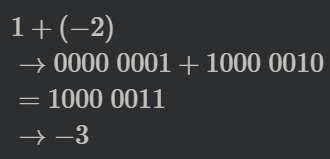

#### 反码(1's complement)

反码解决了无法计算的问题, 但存在 正负零 问题.  
正负零带来的问题有二:
1. 歧义
2. 低效

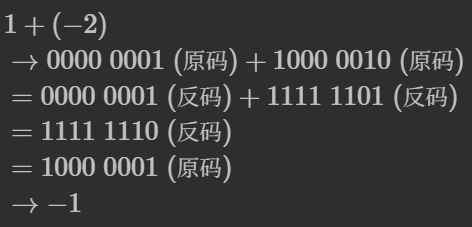

#### 补码(2's complement)

在 -0 的基础上加1会导致进位溢出, 因此正负零歧义得以解决  
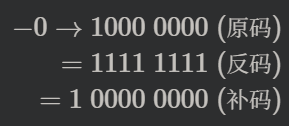

需要注意的是 补码 1000 0000 是个例外, 其原码与补码相同.  
因此计算机规定该补码代表 -128  
实际上 -1 + (-127) 在补码下计算的结果就是 -128  
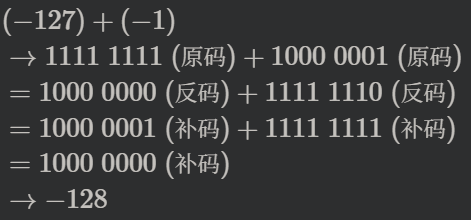

补码暗示了一个事实, 计算机内部硬件主要是基于加法运算设计的.  
与其他运算相比, 其硬件实现更简单, 且更易并行化处理.  
但是将加法运算与基本逻辑运算结合便可完成其他各种数学运算.  

## 浮点数编码

记录一个 32bit(4byte) 二进制数为:  
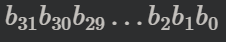

根据 IEEE 754 标准, 32-bit float 由三部分构成:
1. 符号位S: 占1位, 31号
2. 指数位E: 占8位, 30~23号
3. 分数位N: 23位, 22~0号

对应公式如下:  
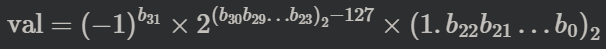
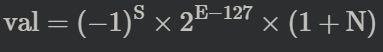

各项取值如下:  
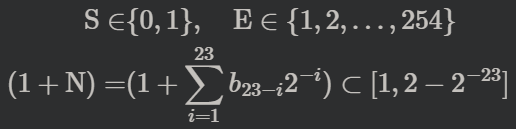

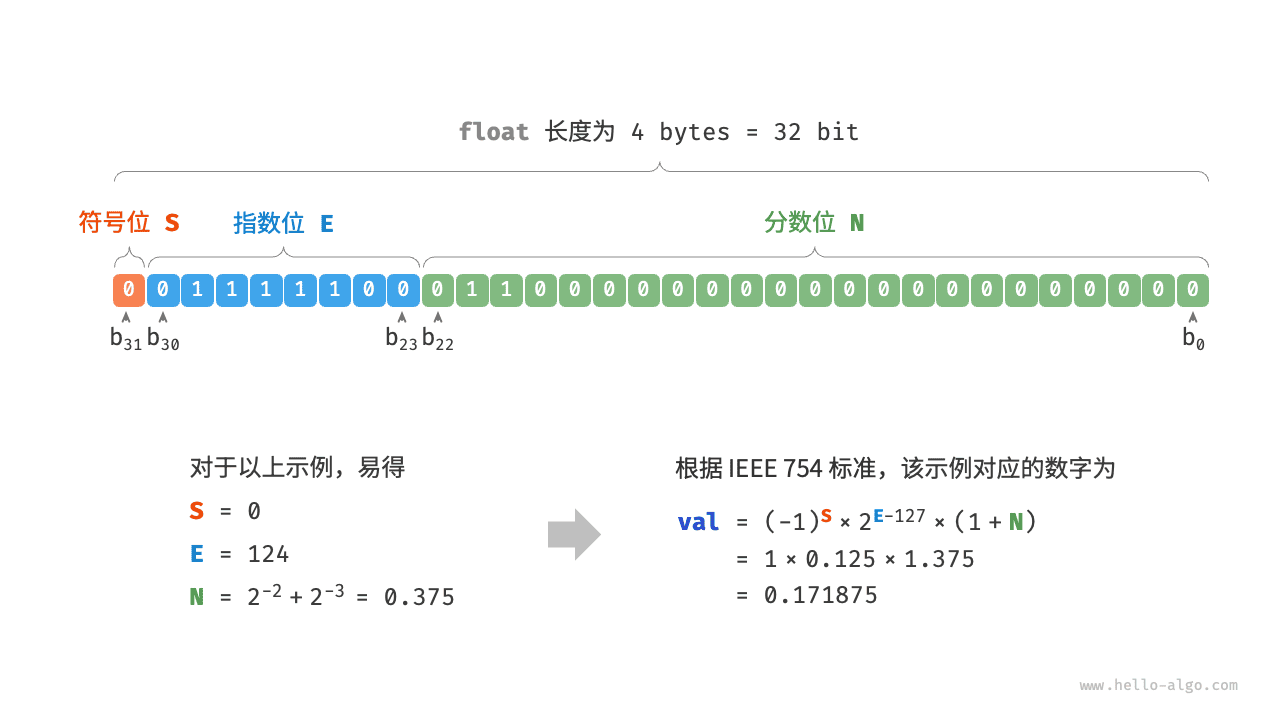

float 拓展了范围, 但牺牲了精度. 由于指数位的存在, float越大, 相邻两个数字之间的差值就越大.

注: 隐含的1是由于二进制数只有 0 和 1 两种表示, 因此留1占位.  
但这样会导致 0 需要特殊表达

指数位 E = 0 和 E = 255 有特殊含义

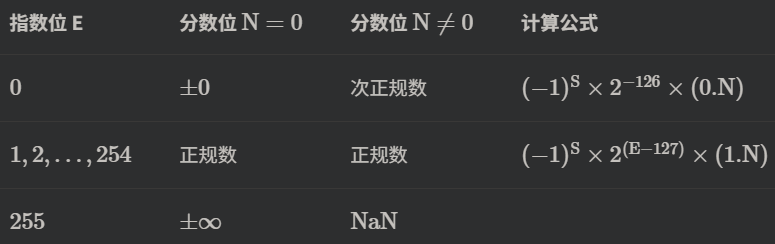

## 字符编码

### ASCII

American Standard Code for Inoformation Interchange, ASCII  
使用 7-bit(低位) 表示一个字符, 最多能表示128个不同字符  
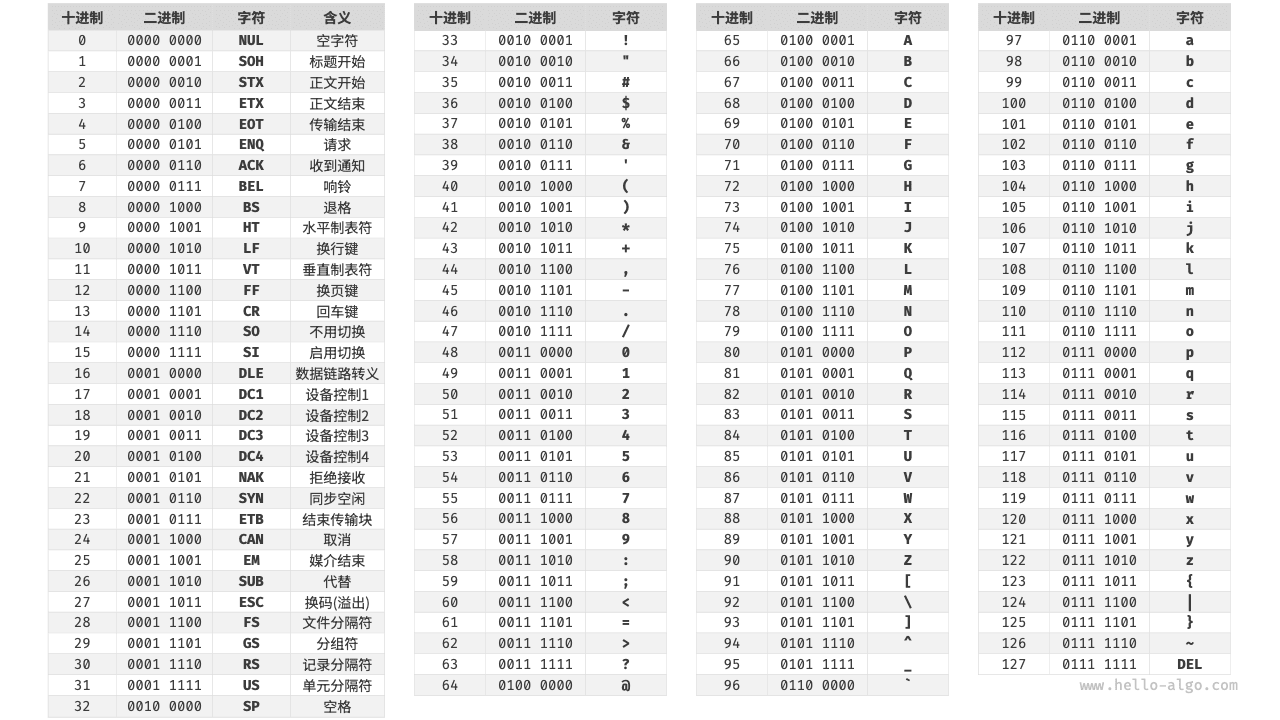

### EASCII

Extended ASCII  
在 ASCII 的基础上拓展到 8-bit, 能够表示256个字符  
在世界范围内, 有很多种适应不同地区的 EASCII 字符集  
其前 128 字符统一为 ASCII 码, 后 128 个字符则各不相同

### GBK

随着计算机的发展, 中国国家标准总局于1980年发表了 GB2412 字符集.  
GB2312 收录了6763个汉字, 满足了当时的基本使用.  
然而 GB2312 无法处理部分罕见字和繁体字.  

GBK(Kuo, 扩展) 则是在 GB2312 的基础上得到的, 共收录 21886 个汉字.  
GBK 方案中, ASCII字符使用1个字节, 汉字使用两个字节.

GB18030 则是更新的标准, 支持少数民族文字, 但由于 UTF-8 的出现, 也就没啥用了

### Unicode

Unicode 于1991年发布, 其致力于构建全球统一字符集标准.  
其理论上限约100万个字符. 截至2022年9月, 其已包含149186个字符.  

其本质是为每个字符分配一个编号(码点), 但其并未规定在计算机中如何存储这些码点.  

例: U+4E2D(十进制20013)

### UTF-8

UTF-8 是是一种可变长度编码, 使用1~4字节来表示一个字符.  
ASCII字符 -> 1字节, 拉丁/希腊字母 -> 2字节, 常见中文 -> 3字节, 生僻字 -> 4字节  

编码规则:
1. 对于长度为1字节的字符, 高位置0, 其余为 Unicode 码点(完全兼容ASCII)
2. 对于长度为n字节的字符(n > 1), 首字节高n位都置1, 第 n+1 位置0. 从第2个字节开始, 将每个字节的高2位都置为10, 其余所有位用于填充 Unicode 码点.

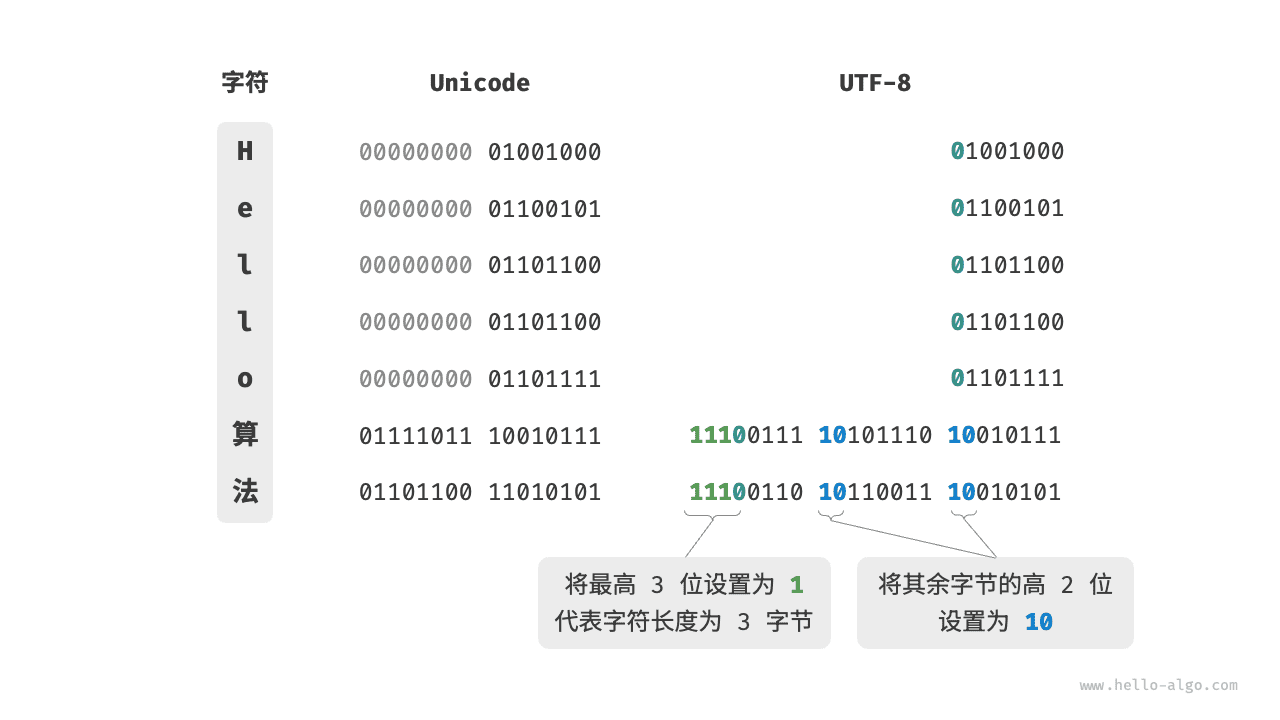

除 UTF-8 外, 还有两种编码:
1. UTF-16: 使用2/4字节来表示一个字符. 所有ASCII字符和常用非英文字符, 都使用2字节; 少数字符使用4字节. 对于2字节字符, UTF-16编码与Unicode码点相等.
2. UTF-32: 每个字符都是以4字节

从空间占用来看, UTF-8 表示英文更高效(1byte); UTF-16 表示某些非英文字符更高效, 如中文, 其只需要2byte, UTF-8 则可能需要3byte.

UTF-16 的字符范围划分:  
0x0000 ~ 0xD7FF     →  2 字节字符（直接存储）  
0xD800 ~ 0xDBFF     →  4 字节字符的"前半部分"（高代理）  
0xDC00 ~ 0xDFFF     →  4 字节字符的"后半部分"（低代理）  
0xE000 ~ 0xFFFF     →  2 字节字符（直接存储）  

范围:  
2 字节能覆盖：0xD7FF + (0xFFFF - 0xDFFF) = 55295 + 8192 = 63487 个字符  
4 字节（代理对）能覆盖：(0xDBFF - 0xD800 + 1) × (0xDFFF - 0xDC00 + 1) = 1024 × 1024 = 1048576 个字符 

注: UTF-16 中的 2 字节 = Unicode 码点，仅当 Unicode 码点不在禁区 0xD800~0xDFFF 时成立  
注: 基本多文本平面(BMP)是整个 0x0000 ~ 0xFFFF，但其中 0xD800 ~ 0xDFFF 这 2048 个位置没有分配任何字符

## 编程语言的字符编码

等长编码与变长编码相比有以下优势:
1. 更快的随机访问
2. 更快的字符计数
3. 更快的字符串操作(分割, 连接, 插入, 删除等)

对于等长编码该操作都是O(1), 对于变长编码则是O(n)
因此, 大多数编程语言都使用 UTF-16 或 UTF-32 这类"等长"编码

注: Unicode 1.0(1991) 规范声称 16-bit 足以表示所有字符, 因此 UTF-16 是被当作等长编码设计的, 但随着 Unicode 规范不断更新, UTF-16 现在已经成为变长编码了  

2001年3月, Unicode 3.1发布, 首次有了超出原始的16位编码范围.

由于以上原因, Java, JavaScript(TS作为其超集完全继承了其处理方式), C# 等早期语言则都使用 UTF-16 编码来处理字符串, 以获得更好的效率. 但由于字符集的拓展, 一旦涉及4字节字符, 其操作结果就会出现些问题. 如 4byte 的 emoji 如果取 length 的话会得到2.

Python3, Go, Rust 等新生语言则提出了不同的编码方案:
1. Python: 其 str 使用 Unicode 编码, 并使用一种更为灵活的编码方式. 其以占用空间最大字符的大小为单位尺寸(ASCII -> 1byte, BMP -> 2byte, Other -> 4byte).
2. Go: string 类型内部使用 UTF-8. rune(4byte) 类型, 用于表示单个 Unicode 码点
3. Rust: str, String 使用 UTF-8. char(4byte) 类型, 用于表示单个 Unicode 码点

注: 在文件存储或网络传输中为了空间利用率和兼用性通常采用 UTF-8 编码

### 补充

静态数据结构: 基于数组实现的数据结构, 其容量固定(自动扩容是自动扩容)  

原码 -> 补码: 取反加1  
补码 -> 原码(2种): 
1. 减1取反
2. 取反加1

为什么 补码 -> 原码 也可以使用 取反加1?  
实际上, 原码和补码的相互转换时计算"补数"的过程.  

补数:  
1. 若 a + b = c
2. 则 a 是 b 到 c 的补数
3. 则 b 是 a 到 c 的补数

而当类型为 n-bit 时, 补码 + 原码 = 10000xxxx(n个0)
即, 补码和原码互为补数, 而取反加1则是求补数的过程.

以 4-bit 为例:
原码 0001 -> 补码 1111
0001 + 1111 = 1 0000

# 数组与链表

## 数组

数组(Array)是一种线性数据结构, 其将相同类型的元素存储在连续的内存空间中

优点:
1. 效率高: 连续内存块, 无需额外开销
2. 支持随机访问: O(1)的时间内访问任何元素
3. 支持缓存

缺点:
1. 内存空间必须连续
2. 插入与删除效率低: O(n)
3. 长度不可变, 高扩容开销
4. 易造成空间浪费

## 链表

链表(Linked List)是一种线性结构, 使用离散的空间存储.

其设计之初就是为了解决数组的问题:
1. 允许离散的内存空间
2. 插入与删除效率高: O(1)
3. 长度可变, 低扩容开销
4. 无空间浪费

缺点:
1. 更大的空间占用: 保存额外的指针
2. 访问效率低: O(n) -> 但是可以外挂哈希表
3. 不支持缓存


In [ ]:
# 链表首节点称为"头节点", 最后一个节点称为"尾节点"
# 注: Python的动态特性是用来兜底和写胶水代码的, 防止类型错误, 以及避免过于繁琐的类型转换
# 而显式类型是用来筑墙的, 用于统一规范.

class ListNode:
    def __init__(self, val: int):
        self.val: int = val
        # | -> 允许两种类型
        self.next: ListNode | None = None


def insert(n0: ListNode, P: ListNode):
    n1 = n0.next
    P.next = n1
    n0.next = P

def remove(n0: ListNode):
    """删除链表 n0 后的首个节点"""
    # 注: 删除完成后虽然 P 仍然指向 n1, 但链表 n0 中已经不包含 P.
    if not n0.next:
        return
    P = n0.next
    
    n1 = P.next
    n0.next = n1
    
    P.next == None

def access(head: ListNode, index: int) -> ListNode | None:
    for _ in range(index):
        if not head:
            return
        head = head.next
    return head

def find(head: ListNode, target: int) -> int:
    index = 0
    while head:
        if head.val == target:
            return index
        head = head.next
        index += 1
    return -1

# 初始化链表
# 通常将头节点作为链表的代称, 以上代码可记作 链表 n0
n0 = ListNode(1)
n1 = ListNode(2)
n2 = ListNode(3)
n3 = ListNode(4)

n0.next = n1
n1.next = n2
n2.next = n3

常见链表包含三种:
1. 单向链表
2. 环形链表(首尾相连)
3. 双向链表

单向链表常见应用:
1. 栈与队列:
当插入和删除在同一端时, 先进后出 -> 栈
当插入和删除在两端时, 先进先出 -> 队列
2. 哈希表: 链式地址是解决哈希冲突的主流方案之一
3. 图: 临接表是表示图的一种常用方式

双向链表常见应用:
1. 高级数据结构: 红黑树, B树
2. 浏览器历史: 前进或后退按钮
3. LRU算法: 淘汰最少访问的缓存

环形链表常见应用:
1. 环形缓冲区

## 列表

列表(List)表示元素的有序集合, 支持访问, 修改, 添加, 删除和遍历等操作. 无需使用者考虑容量限制问题. 其可以基于链表或数组实现.  
- 链表: 天然的列表, 可灵活扩容
- 数组: 有长度限制的列表

通常情况下, 编程语言标准库提供的列表是基于动态数组(Dynamic Array)实现的. 其访问速度快, 并且可以动态扩容.

需要注意的是, 基于动态数组的列表继承了数组 插入和删除慢 但 存取快 的特性

In [5]:
# 初始化列表
nums: list[int] = [1, 2, 3, 4, 5]

# 访问元素
num: int = nums[0]

# 清空列表
nums.clear()

# 尾部追加元素
nums.append(1)
nums.append(2)
nums.append(3)

# 插入元素
nums.insert(1, 1)

# 删除元素
nums.pop(2)

2

In [9]:
# 拼接列表
nums1: list[int] = [1, 2, 3]
nums2: list[int] = [4, 5, 6]

nums1 += nums2

nums1

[1, 2, 3, 4, 5, 6]

In [10]:
# 排序列表
nums = [2, 1, 5, 3]
# Python 使用 Timsort -> 性能极佳
nums.sort()

nums

[1, 2, 3, 5]

### 列表的实现

Python 遵循公式, 简而言之:
- 当列表较小时, 扩容很快
- 当列表很大时, 扩容比例接近 1.125(1/8)



In [14]:
class MyList:
    def __init__(self):
        # 普通公有变量: 蛇形命名法( _ 下划线分隔)
        # 受保护变量: _ 下划线开头
        #     表明这是内部变量, 告知其他开发者不要轻易在类外访问
        # 私有变量: __ 双下划线开头(不建议频繁使用)
        #     该变量完全不希望被子类或外部访问
        #     与受保护变量不同, 其受到硬约束
        #     其会被Python内部重命名 self.__variable ->  _ClassName__variable
        self._capacity: int = 10 # 初始容量
        self._arr: list[int] = [0] * self._capacity # 数组
        self._size: int = 0 # 当前长度
        # C++ 的 Vector 是 2 倍
        self._extend_ratio: int = 2 # 每次扩容倍数

    def size(self) -> int:
        return self._size

    def capacity(self) -> int:
        return self._capacity

    def get(self, index: int) -> int:
        if index < 0 or index >= self._size:
            raise IndexError('索引越界')
        return self._arr[index]

    def set(self, num: int, index:int):
        if index < 0 or index >= self._size:
            raise IndexError('索引越界')
        self._arr[index] = num

    def add(self, num: int):
        if self._size == self._capacity:
            self.extend_capacity()
        self._arr[self._size] = num
        self._size += 1

    def insert(self, num: int, index: int):
        if index < 0 or index >= self._size:
            raise IndexError('索引越界')
        if self._size == self.capacity():
            self.extend_capacity()

        for j in range(self._size - 1, index - 1, -1):
            self._arr[j + 1] = self._arr[j]
        
        self._arr[index] = num
        self._size += 1


    def remove(self, index: int) -> int:
        """删除元素"""
        if index < 0 or index >= self._size:
            raise IndexError("索引越界")
        num = self._arr[index]
        # 将索引 index 之后的元素都向前移动一位
        for j in range(index, self._size - 1):
            self._arr[j] = self._arr[j + 1]
        # 更新元素数量
        self._size -= 1
        # 返回被删除的元素
        return num

    def extend_capacity(self):
        self._arr = self._arr + [0] * self.capacity() * (self._extend_ratio - 1)
        self._capacity = len(self._arr)

    def to_array(self) -> list[int]:
        return self._arr[: self._size]
            

## 缓存

缓存(Cache): 具有最快读写速度的存储设备.  
其大容量与高速度难以兼得: 随着 L1, L2, L3 的缓存容量逐步增大, 其物理尺寸会增大, 且与CPU核心间的举例变远, 导致速度下降

缓存会采用如下加载机制, 以使得 缓存命中 概率更高:
1. 缓存行: 以行而非字节为单位传输数据
2. 预取: 处理器会尝试预测数据方位模式(顺序读取, 固定补偿跳跃等)来预取数据
3. 空间局部性: 如果一个数据被访问, 其附近的数据也可能被访问. 因此加载某一数据时也会加载附近数据.
4. 时间局部性: 如果一个数据被访问, 其在未来也可能会被访问. 其会被保留在缓存中

由于数组具有更高的缓存命中率, 其在操作效率上通常优于链表.  

需要注意的是, 链表这类离散的类型容易导致内存碎片化. 内存膨胀便是由于无法回收的空洞太多导致的.

## QA

栈和堆上内存操作效率基本一致, 但由于堆是动态分配, 其分配和释放效率更低.  

与许多语言不同, Python的数字也被包装为对象, 列表中存储的不是数字本身, 而是对其的引用

In [19]:
# 此类创建方法为复制引用
res = [[0]] * 10
res[0][0] = 1
res

[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

In [20]:
# 此类创建方法才是独立初始化
res = [[0] for _ in range(10)]
res[0][0] = 1
res

[[1], [0], [0], [0], [0], [0], [0], [0], [0], [0]]

# 栈与队列

## 栈

栈(Stack)是一种遵循先入后出逻辑的线性数据结构.  
其可以由数组或链表来实现.  
常见方法包括:
1. push 入栈至栈顶
2. pop 栈顶出栈
3. peek 访问栈顶元素

## 队列

队列(Quene)是一种遵循先入先出逻辑的线性数据结构.
常见方法包括:
1. push 入队至队尾
2. pop 队首出队
3. peek 访问队首

In [3]:
from collections import deque

# 初始化队列
# 一般使用双向队列 deque
# 单向队列 queue 不太好用
que: deque[int] = deque()

# 入队
que.append(1)
que.append(2)
que.append(3)
que.append(4)

# 访问队首
front: int = que[0]

# 元素出队
pop: int = que.popleft()

# 获取队列长度
size: int = len(que)

# 判断是否为空
is_empty: bool = len(que) == 0

## 双向队列

双向队列(double-ended queue)提供了更高的灵活性, 允许在头部和尾部执行增加和删除操作.

常见方法包括:
1. push_first 入队 -> 队首
2. push_last 入队 -> 队尾
3. pop_first 删除
4. pop_last
5. peek_first
6. peek_last

由于双向队列兼具栈与队列的逻辑, 其可以实现两者的所有应用场景.  

# 哈希表

哈希表(Hash Table), 又称散列表.  
其进行增删查改的时间复杂度都是O(1).  

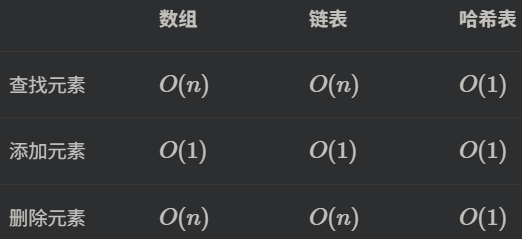

In [1]:
# 在 Python 中, dict 就是哈希表
hmap: dict = {}

# 添加操作
hmap[12836] = "小哈"
hmap[15937] = "小啰"
hmap[16750] = "小算"
hmap[13276] = "小法"
hmap[10583] = "小鸭"

# 查找操作
name: str = hmap[15937]

# 删除操作
hmap.pop(10583)

'小鸭'

In [ ]:
# 遍历
# items, keys, value
# 返回可迭代对象, 可以使用 list(items) 转换为列表
for key, value in hmap.items():
    print(key, "->", value)

## 哈希表的简单实现

哈希表的核心在于哈希函数(hash function), 哈希函数将一个较大的输入空间映射到一个较小的输出空间. 进而映射到数组索引之上.  
哈希表的本质实际上利用了 输入数据的均匀分布 以及 输入数据的有限性.  

一个简单的映射如下:  
index = hash(key) % capacity  
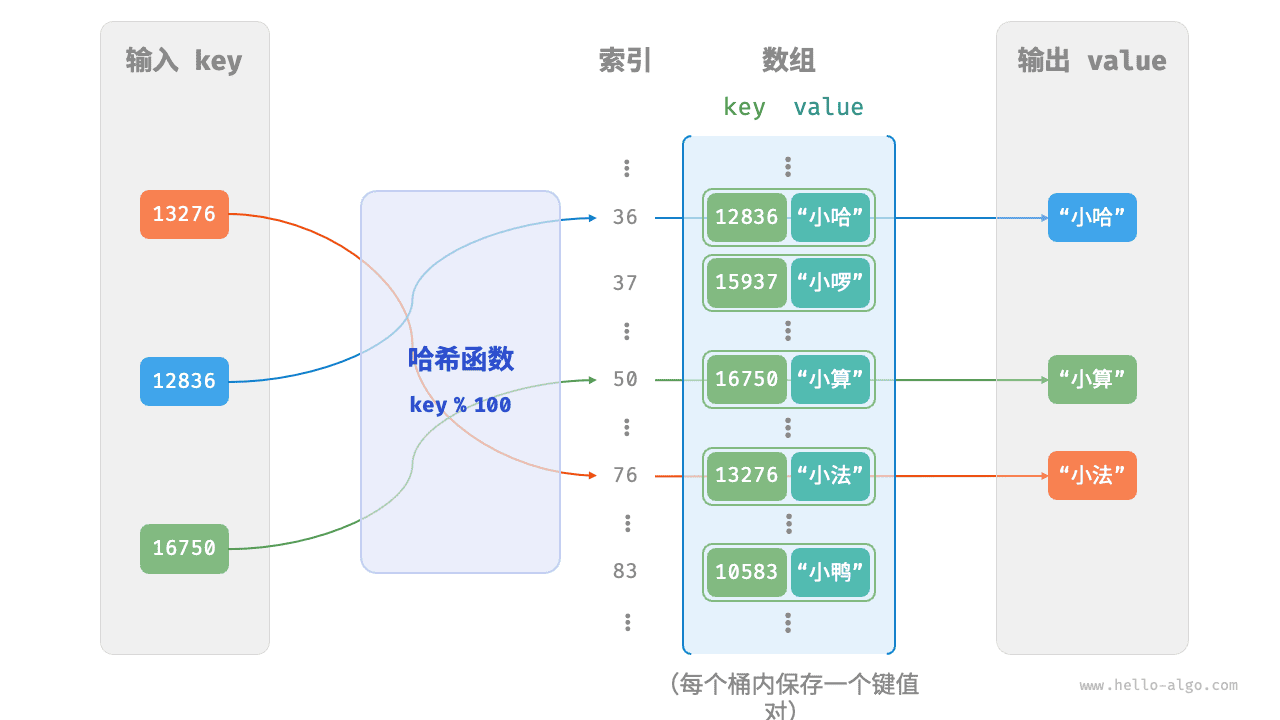

## 扩容

从本质上看, 哈希函数的作用是将大的输入空间映射到相对较小的输出空间. 因此, 理论上存在多个输入对应同一输出的情况, 即哈希冲突(hash collision).  
可以想到, 通过扩大输出空间的范围可以降低哈希冲突的概率.  

哈希表的扩容需要将所有键值对迁移至新表, 并且需要重算所有 index, 其扩容开销很大. 因此, 通常预留足够大的哈希表容量防止频繁扩容.

负载因子(load factor): 元素数量 / 桶数量  
其只计算有多少个桶被占用, 不管桶内有多少个冲突元素.  
其用于衡量哈希冲突的严重程度, 也作为哈希表扩容的触发条件.  
在 Java 中, 当负载因子超过0.75时, 会将表扩容至2倍.

## 哈希冲突

由于哈希函数的输入空间远大于输出空间, 理论上哈希冲突是不可避免的.  
虽然扩容可以有效解决该问题, 但由于其开销过大, 因此我们采用以下策略:
1. 改良结构, 使得其在出现哈希冲突时依然能够正常工作
2. 仅在哈希冲突比较严重时才执行扩容操作(在链式地址中, 其包括负载因子和链表长度).

哈希表结构的改良方法有两种:
1. 链式地址
2. 开放寻址

### 链式地址

链式地址(separate chaining), 简而言之就是将桶内元素换为链表节点. 如果发生哈希冲突, 直接追加链表.  
但其有以下局限性:
1. 占用空间更大
2. 查询效率降低

值得注意的是, 当链表很长时, 可以将链表转换为 AVL树 或 红黑树, 从而将时间复杂度优化至 O(log n)

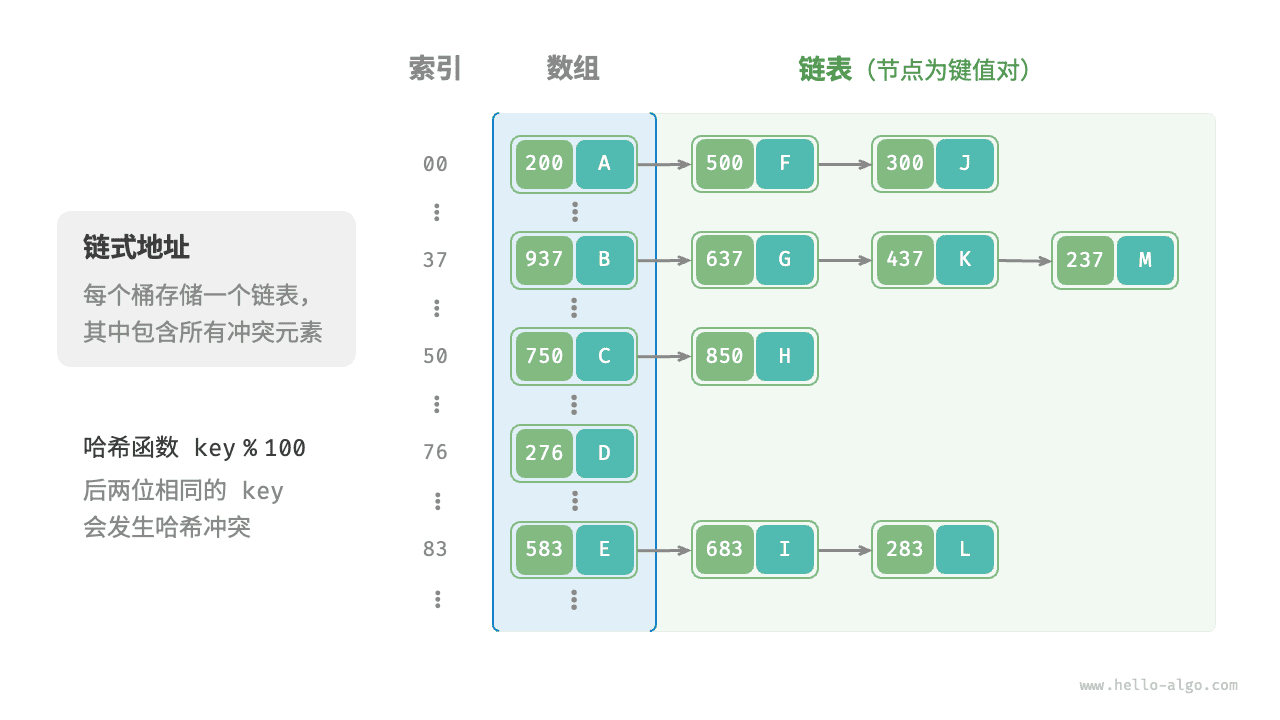

### 开放寻址

开放寻址(Open Addressing), 不引入额外的结构, 而是用过多次探测来解决哈希冲突.  
探测方式包括:
1. 线性探测
2. 平方探测
3. 多次哈希

值得注意的是, 在开放寻址中通常使用 懒删除(lazy deletion) 策略: 其不直接从哈希表中移除元素, 而是利用一个常量 TOMBSTONE 来标记.  
然而, 烂删除可能会加速哈希表性能退化. 设想一个插入极多冲突元素的哈希表, 其中间的元素全部被删除, 大量位置被常量标记的情况.  
因此每次探测时通常会记录第一个 TOMBSTON 的位置, 并且填入最后一个元素.

#### 线性探测

线性探测采用固定步长的线性搜索来进行探测:
- 插入元素: 通过哈希函数计算索引, 若发现索引内已有元素, 则从冲突位置向后线性遍历(步长通常为1), 直到找到空桶后将其放入
- 查找元素: 若发现哈希冲突, 其使用相同步长进行遍历, 直到找到对应元素; 如果遇到空桶, 说明元素不再哈希表中

然而, 线性探测容易产生"聚集现象". 数组中被连续占用的位置越长, 这些位置发送冲突的可能性越大, 并进一步促进元素聚堆. 进而使得增删查改的效率劣化.  

值得注意的是, 线性探测通常将哈希表看作环形数组以更好的利用空间.

#### 平方探测

平方探测与线性探测类似, 但其并非固定步长, 而是以"探测次数的平方"来作为步长.  
如: 1, 4, 9, 12  

其具可以缓解聚集效应, 使得数据分布的更加均匀.  
但是其仍然存在聚集现象, 并且由于平方的增长, 其无法探测整个哈希表. 使得出现无法放入的情况.

#### 多次哈希

顾名思义, 其使用多个哈希函数来进行探测.
f1位置存在, 使用f2; f2位置存在, 使用f3...

### 编程语言的选择

- Python 采用开放寻址, dict 使用伪随机数进行探测
- Java 使用链式寻址
- Go 采用链式寻址

不管怎么看, 链式寻址都比开放寻址强

## 哈希算法

为实现既快又稳的特点, 哈希算法应具备以下特点:
1. 确定性: 对于相同的输入, 哈希算法应该始终产生相同的输出
2. 效率高: 应该具有较小的计算开销
3. 均匀分布: 哈希算法应该使得键值对均匀分布在哈希表中

哈希算法还可用于密码学中  
但对于密码学应用, 其应该具有更多的安全特性:
1. 单向性: 无法根据哈希值反推
2. 抗碰撞性: 应该难以找到两个不同的输入, 使得其哈希值相同
3. 雪崩效应: 输入的微小变化应当导致输出的显著且不可预测的变化

注: 均匀分布 与 抗碰撞性 是两个独立的概念

### 哈希算法的简单设计

In [4]:
def add_hash(key: str) -> int:
    hash = 0
    modulus = 1000000007
    for c in key:
        hash += ord(c)
    return hash % modulus

def mul_hash(key: str) -> int:
    hash = 0
    modulus = 1000000007
    for c in key:
        hash = 31 * hash + ord(c)
    return hash % modulus

def xor_hash(key: str) -> int:
    hash = 0
    modulus = 1000000007
    for c in key:
        hash ^= ord(c)
    return hash % modulus

def rot_hash(key: str) -> int:
    hash = 0
    modulus =1000000007
    for c in key:
        hash = (hash << 4) ^ (hash >> 28) ^ ord(c)
    return hash % modulus

使用大质数取模, 以保证哈希值在合适的范围内.  
大质数作为模数可以最大化地保证哈希值均匀分布. 因为其不与其他数字存在公约数, 因而可以"减少"周期性.

### 常见的哈希算法

- MD5 和 SHA-1 已被多次成功攻击, 目前被各类安全应用弃用
- SHA-2 中的 SHA-256 是最安全的哈希算法之一, 目前未出现成功攻击案例
- SHA-3 与 SHA-2 相比开销更低, 但目前覆盖程度低于 SHA-2

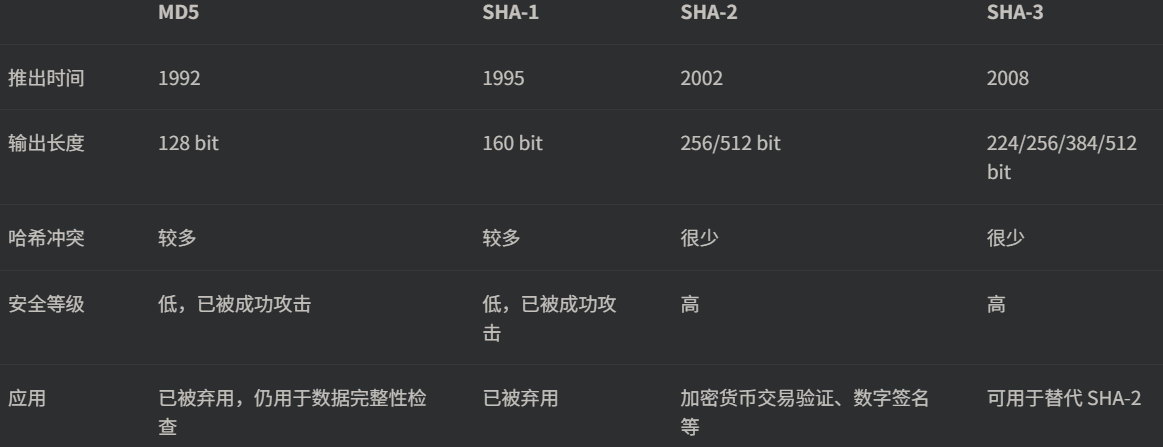

### 数据结构的哈希值

以 Python 的 hash 函数为例:
- 整数 和 布尔 的哈希值就是其本身
- 浮点数 和 字符串 较为复杂
- 元组 是对每个元素进行哈希, 然后组合哈希值
- 对象的哈希值通过 内存地址 生成

# 树

## 二叉树

二叉树(binary tree)是一种非线性数据结构, 体现了一分为二的分治逻辑.  

每个节点都有两个引用(指针):
1. 左子节点(left-child node)
2. 右子节点(right-child node)

而该节点则被称为两个子节点的父节点(parent node).  
而子节点和以下节点形成的树又称为:
1. 左子树(left subtree)
2. 右子树(right subtree)

在二叉树中, 除叶节点外, 其他所有节点都包含子节点和非空子树

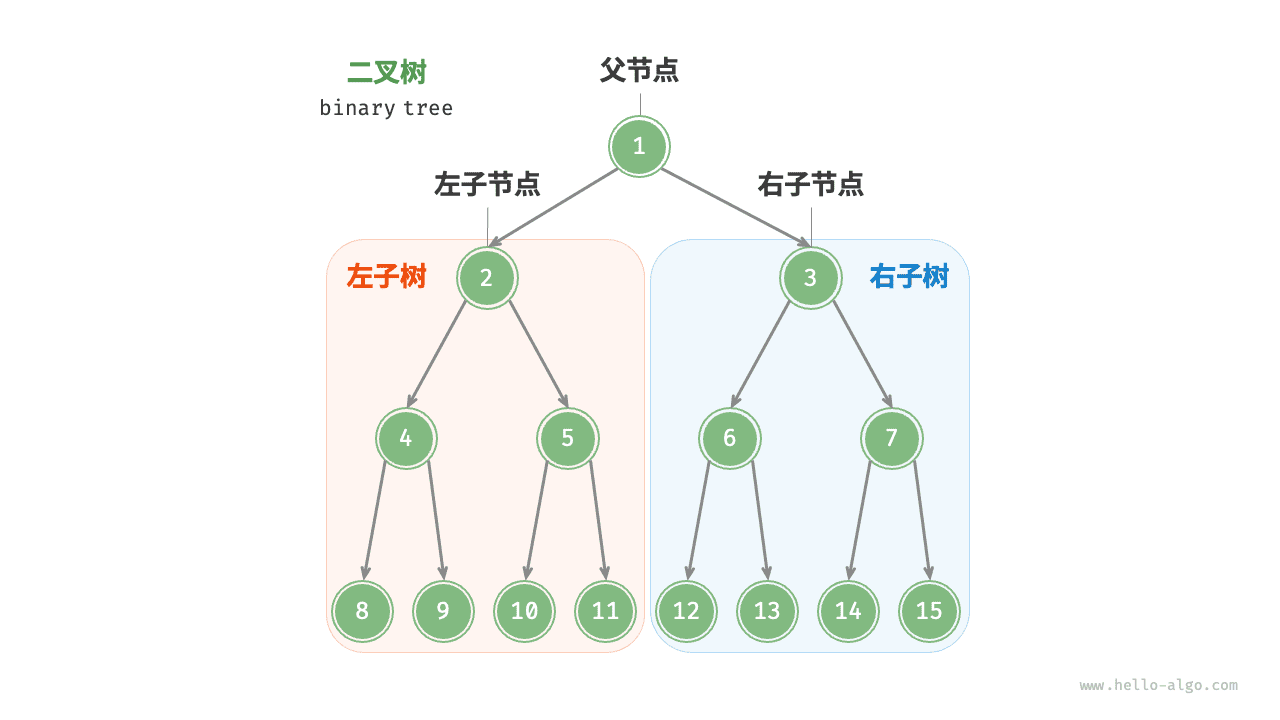

### 二叉树常见术语

- 根节点(root node): 顶层节点
- 叶节点(leaf node): 没有子节点的节点(两个指针均为None)
- 边(edge): 连接两个节点的线段(即指针)
- 层(level): 从顶层递增, 根节点位于1层
- 度(degree): 子节点数量, 在二叉树中 degree∈[0,2]
- 深度(depth): 从根节点到该节点所经过边的数量(从上数)
- 高度(height): 从该节点到最远的叶节点所经过的数量(从下数)
- 树的高度(height): 从根节点到最远叶节点所经过边的数量(即将根节点视为高度0)

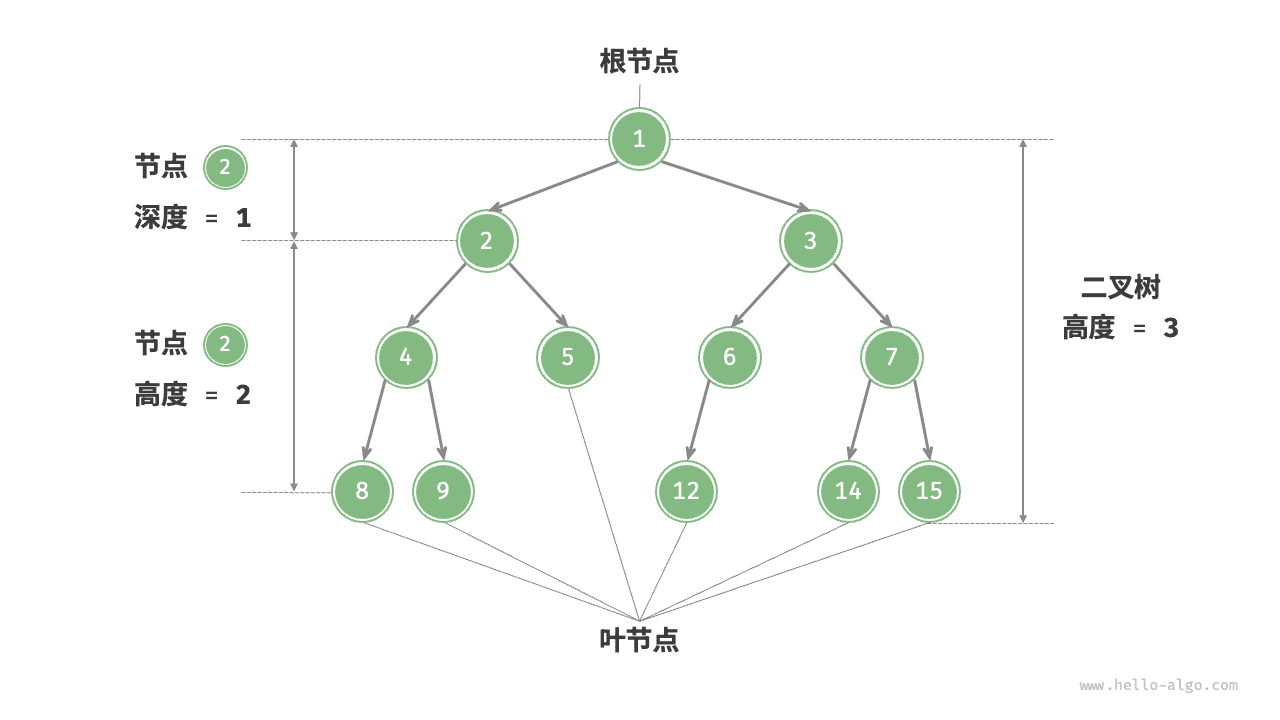

### 二叉树基本操作

In [1]:
class TreeNode:
    def __init__(self, val: int):
        self.val: int = val
        self.left: TreeNode | None = None
        self.right: TreeNode | None = None

In [4]:
# 注: 在 Python 中, 一切皆对象, 传参皆引用. 区别只在于是否可变
# 初始化二叉树
n1 = TreeNode(1)
n2 = TreeNode(2)
n3 = TreeNode(3)

# 构建节点间的引用
n1.left = n2
n1.right = n3

### 常见二叉树类型

- 完全二叉树: 叶节点从左到右排列, 其他层全满
  - 完美二叉树: 所有层全满
- 完满二叉树: 除叶节点外, 所有节点的度都为2
- 平衡二叉树: 任意节点的两个子树高度差不超过1


#### 完美二叉树

完美为叉树(perfect binary tree)所有层节点都被完全填满.  
在完美二叉树中, 叶节点的度为0, 其余的度都是2.  
反应了自然界中的细胞分裂现象.

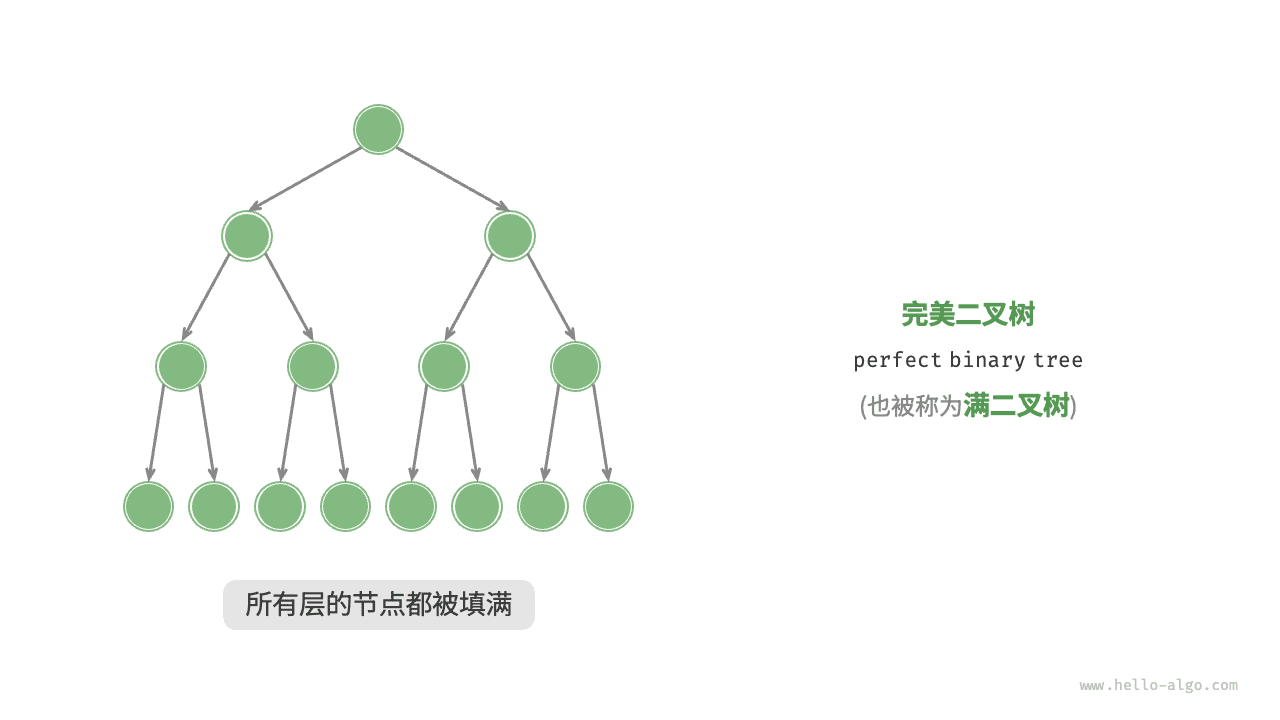

#### 完全二叉树

完全二叉树(complete binary tree)仅允许底层节点不被完全填满, 且最底层节点必须从左到右依次填充.

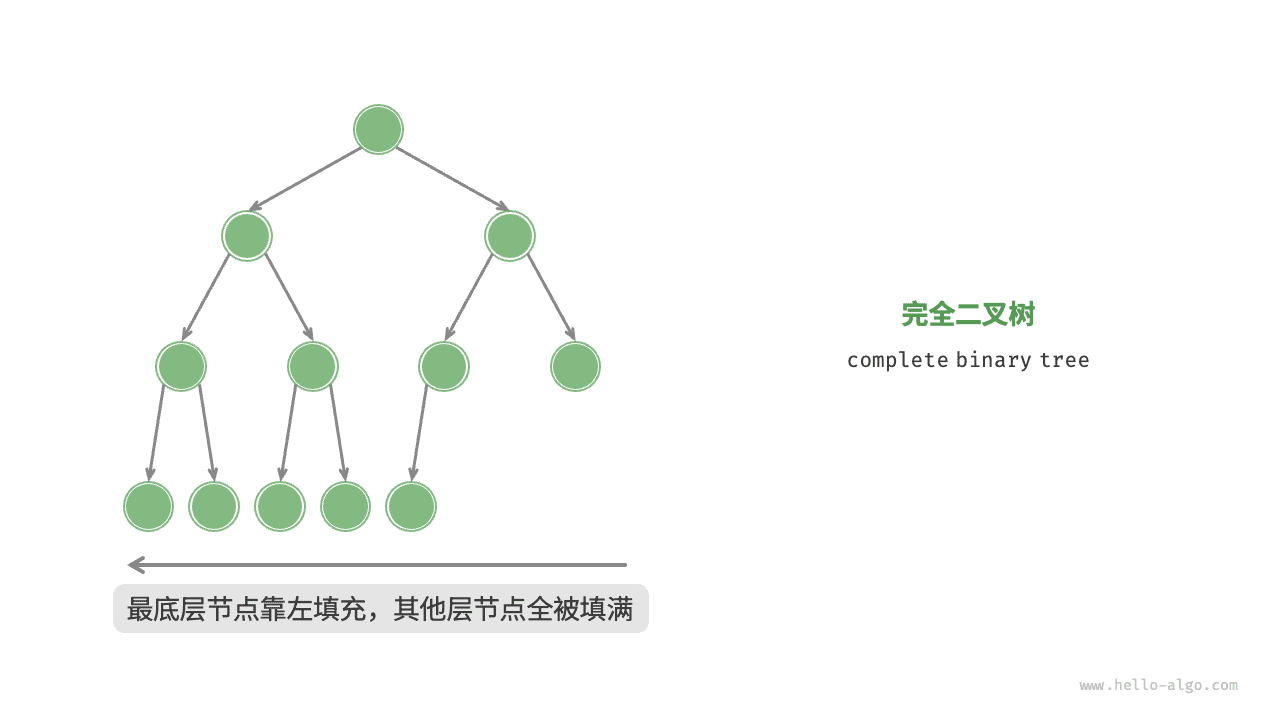

#### 完满二叉树

完满二叉树(full binary tree)除叶节点外, 其余所有节点都有两个子节点.

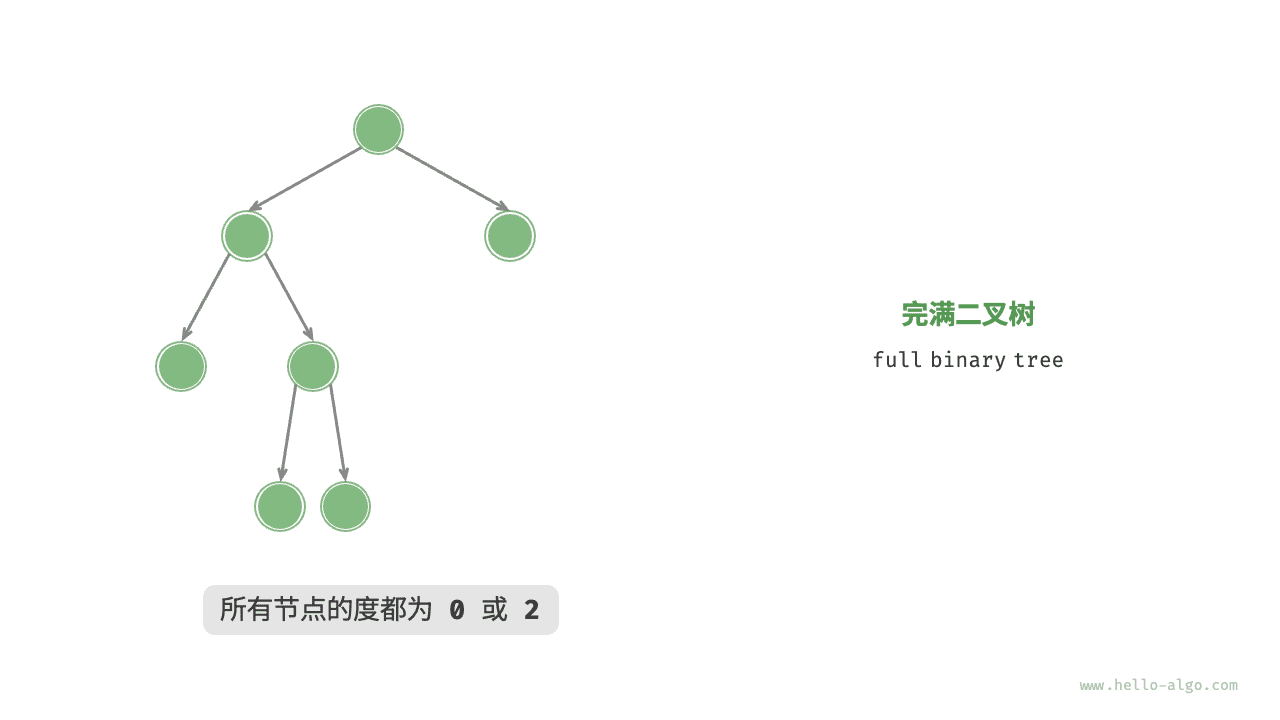

#### 平衡二叉树

平衡二叉树(balanced binary tree)中任意节点的左子树和右字数的高度之差绝对值不得超过1.

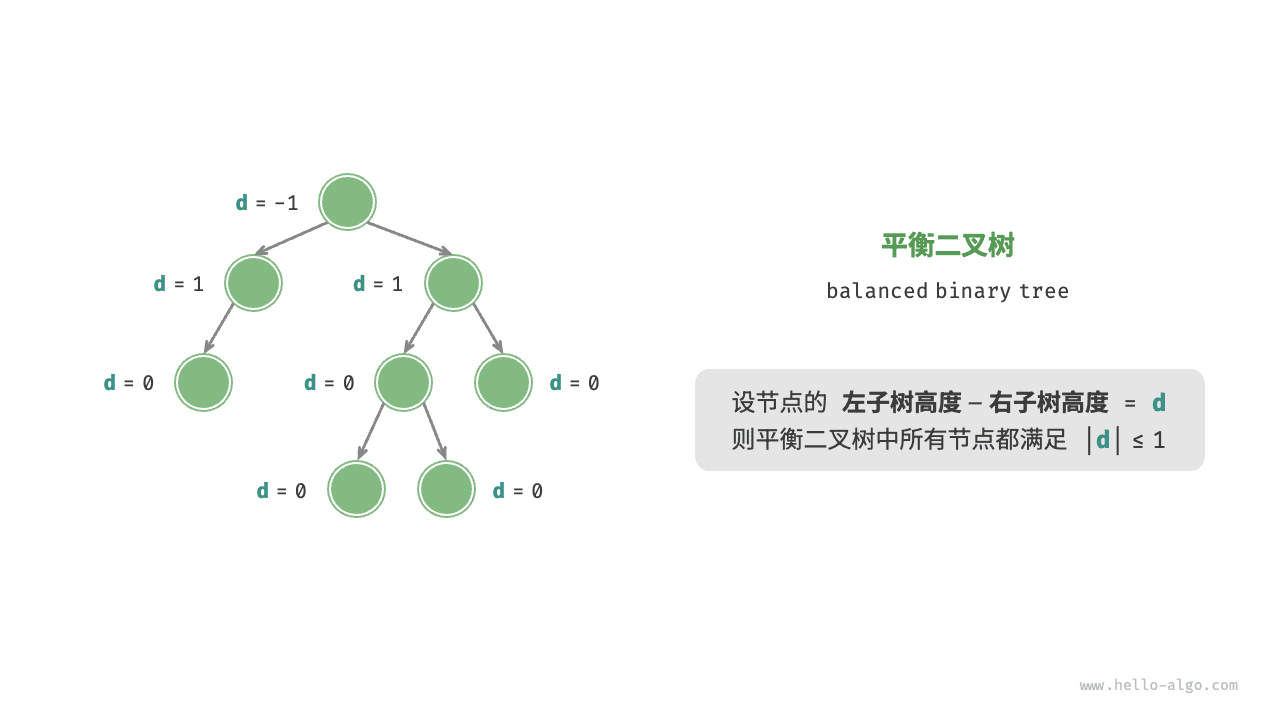

### 二叉树的退化

- 最好 -> 完美二叉树: 可以充分发挥"分治"的优势
- 最差 -> 链表: 各项操作都变为线性操作, 实践复杂度退化至 O(n)

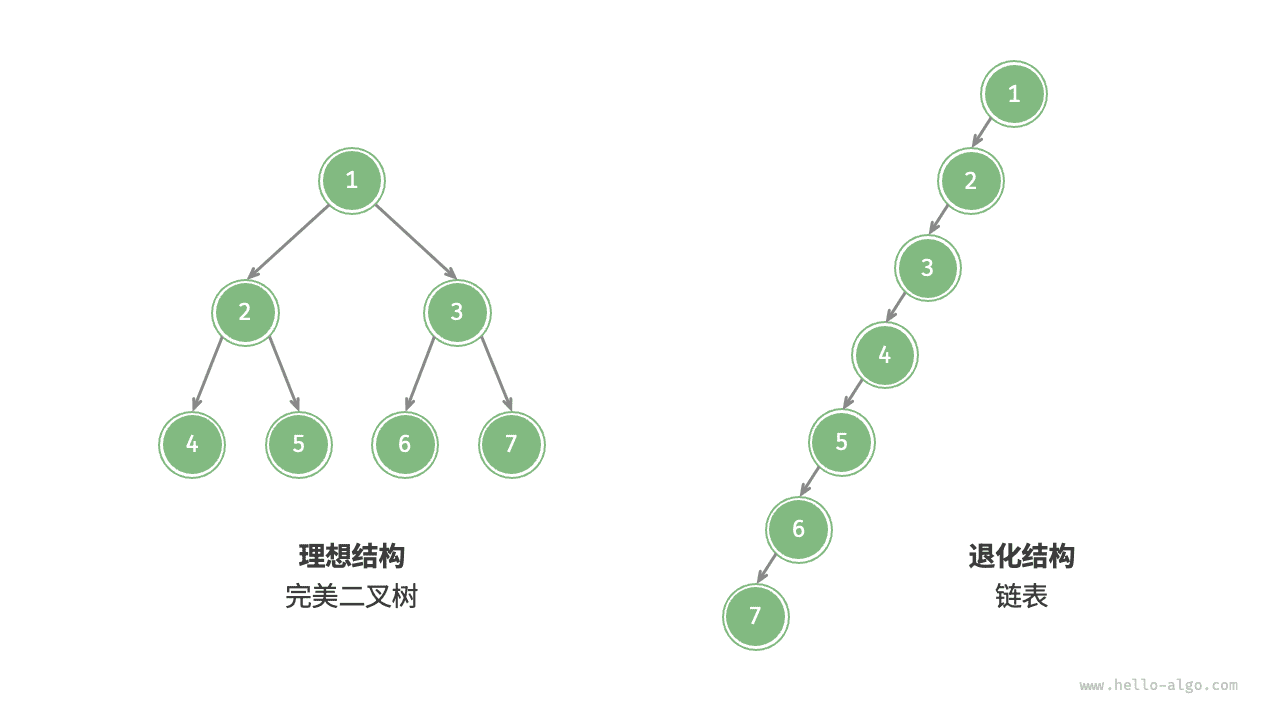

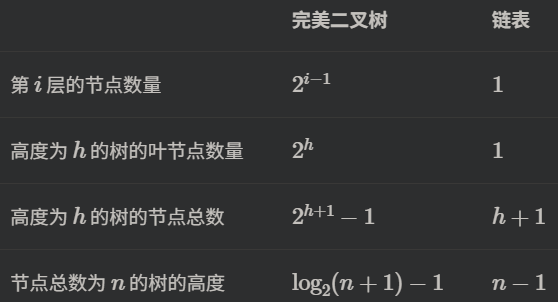

## 二叉树遍历

二叉树常见的遍历方式包括四种:
1. 层序遍历
2. 前序遍历
3. 中序遍历
4. 后序遍历

### 层序遍历

层序遍历(level-order traversal):
1. 从顶层到底层逐层遍历
2. 每层从左到右遍历

其本质属于广度优先遍历(breadth-first traversal), 亦称广度优先搜索(breadth-first search, BFS)

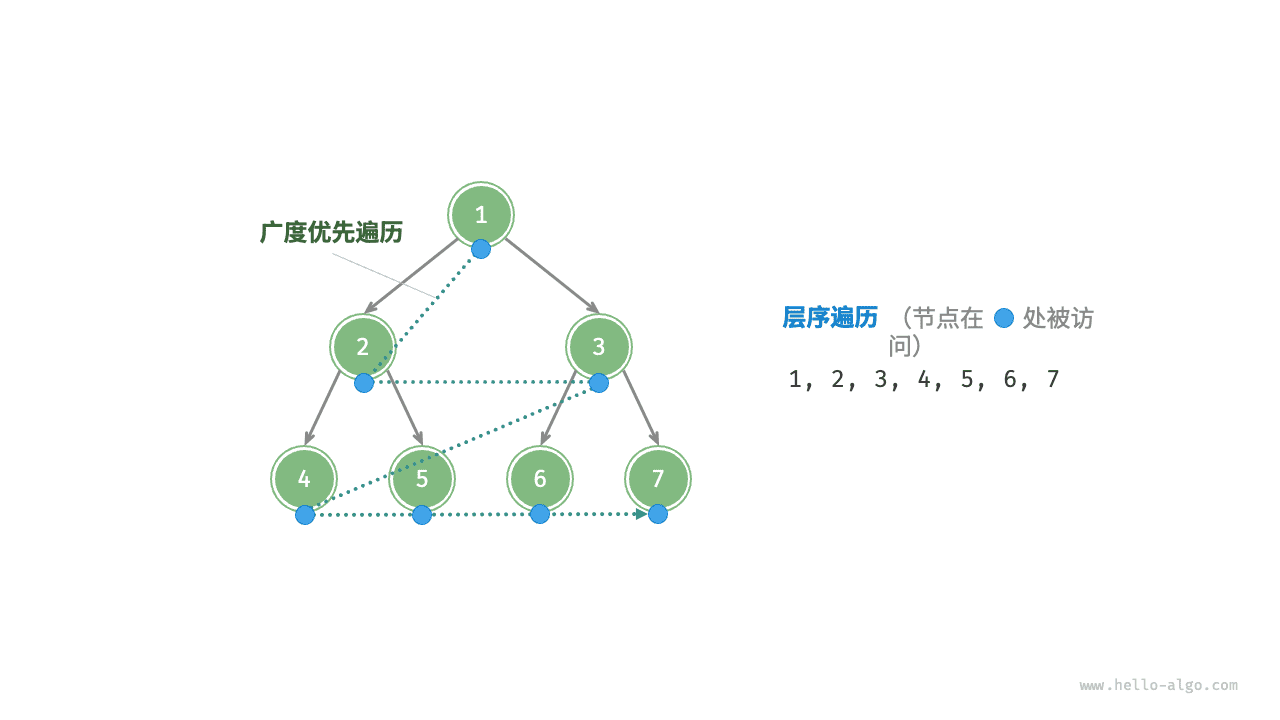

In [ ]:
def level_order(root: TreeNode | None) -> list[int]:
    queue: deque[TreeNode] = deque()
    queue.append(root)

    res = []
    while queue:
        node: TreeNode = queue.popleft()
        res.append(node.val)
        if node.left is not None:
            queue.append(node.left)
        if node.right is not None:
            queue.append(node.right)
    
    return res

### 前序 中序 后序遍历

相应的, 这三种遍历都属于深度优先遍历(depth-first traversal), 亦称深度优先搜索(depth-first search, DFS)  
深度优先遍历就像是绕着整颗二叉树的外围走一圈, 每个节点都会遇到三个位置, 分别对于 前序 中序 后序

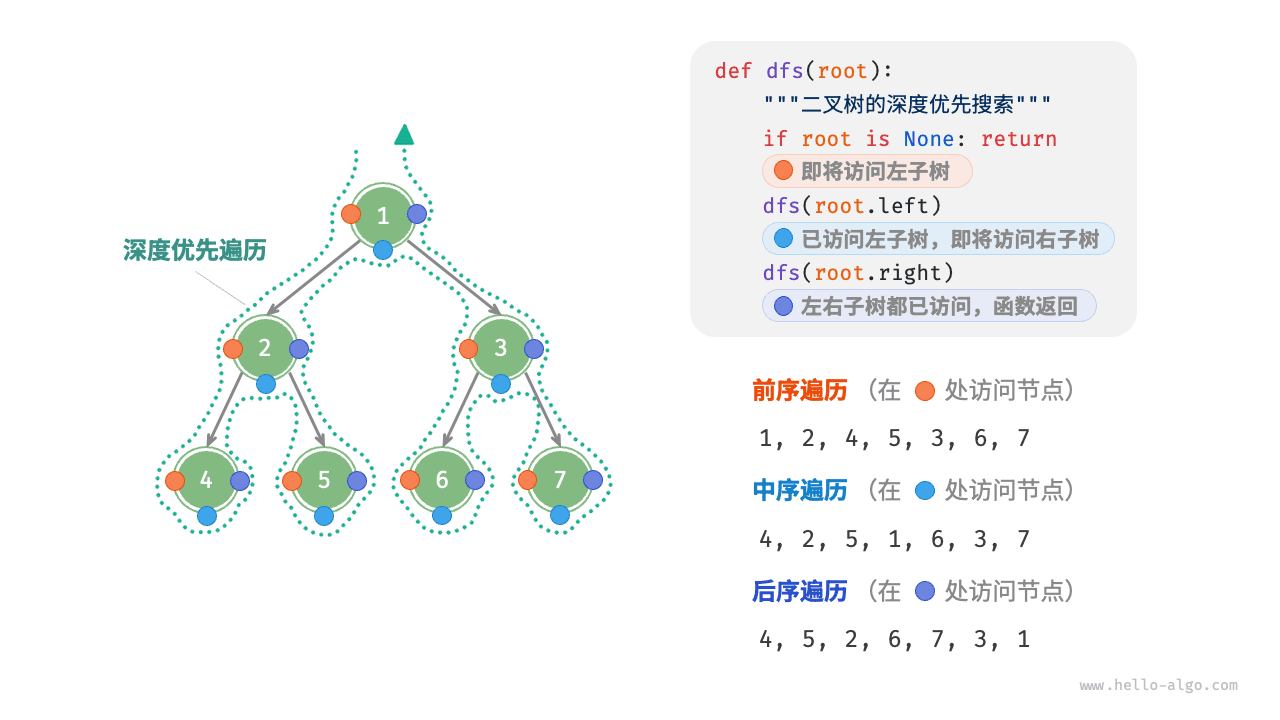

In [6]:
# 深度优先搜索通常基于递归实现
res: list[int] = []

def pre_order(root: TreeNode | None):
    if root is None:
        return
    # 前序优先级: 根节点 -> 左子树 -> 右子树
    res.append(root.val)
    pre_order(root.left)
    pre_order(root.right)

def in_order(root: TreeNode | None):
    if root is None:
        return
    # 中序优先级: 左子树 -> 根节点 -> 右子树
    in_order(root.left)
    res.append(root.val)
    in_order(root.right)

def post_order(root: TreeNode | None):
    if root is None:
        return
    # 后序优先级: 左子树 -> 右子树 -> 根节点
    post_order(root.left)
    post_order(root.right)
    res.append(root.val)

## 二叉树的数组表示

### 完美二叉树

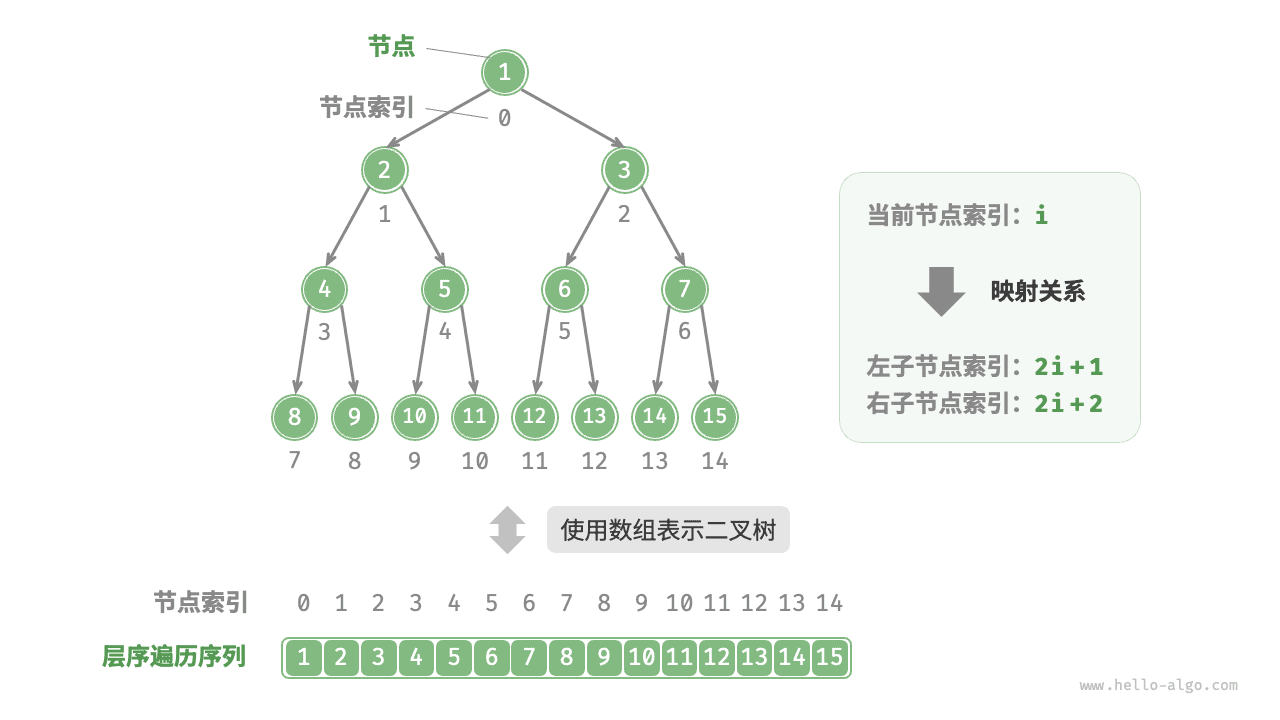

### 任意二叉树

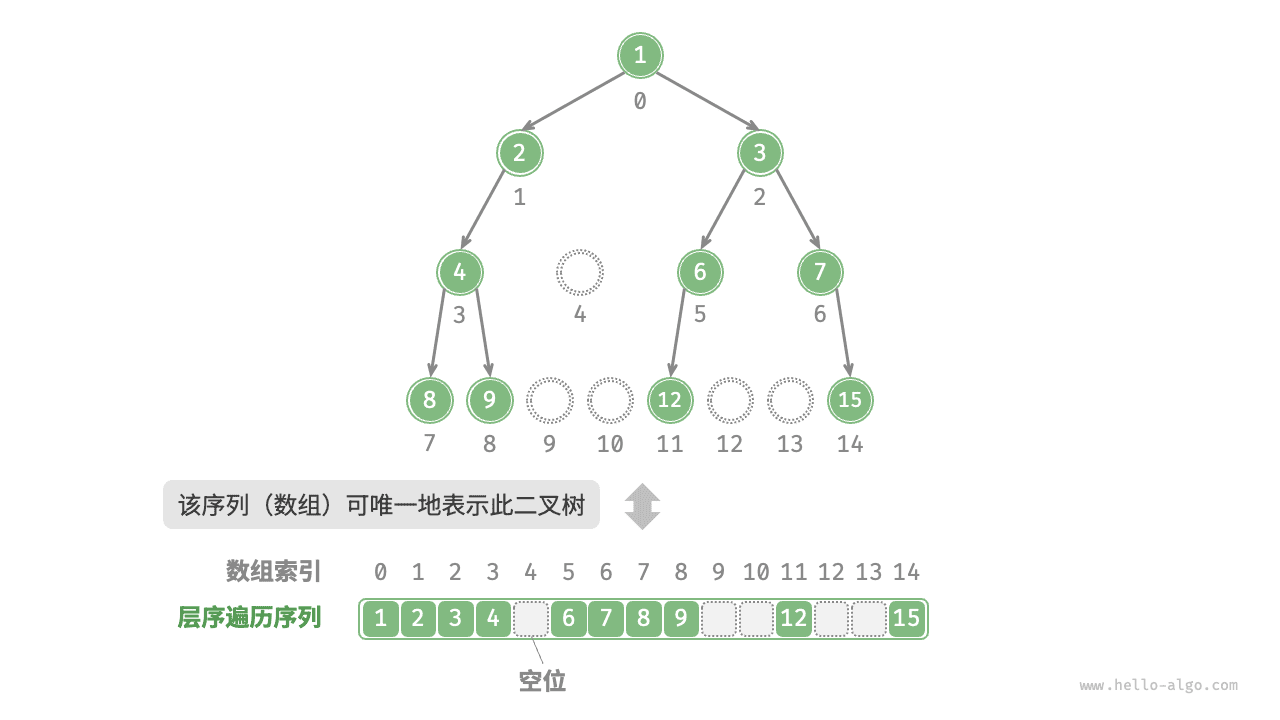

值得说明的是, 完全二叉树非常适合用数组来表示

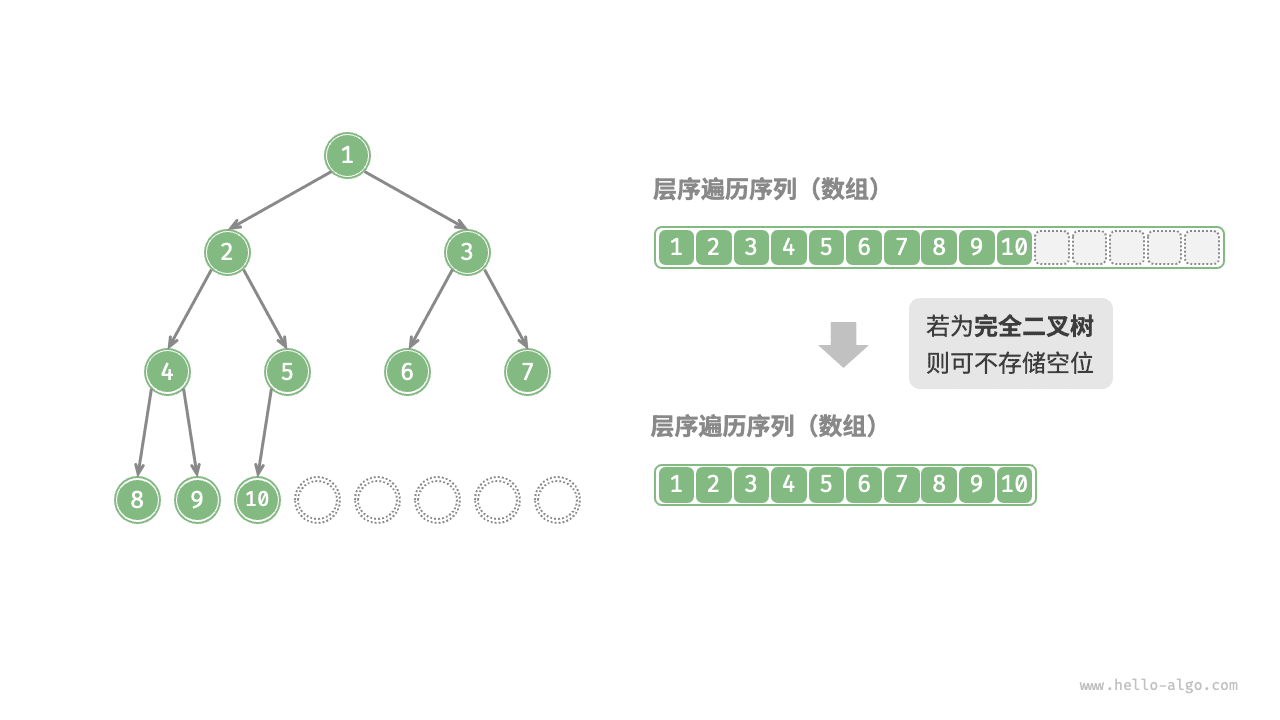

### 数组表示的优点与局限性

优点:
1. 空间连续, 缓存友好 -> 访问与遍历速度快
2. 节省空间
3. 允许随机访问

局限性:
1. 需要连续的内存空间, 因此不适合存储数据量过大的树
2. 修改节点需要数组操作, 部分操作效率很低
3. 当二叉树中存在大量 None 时, 空间利用率低

## 二叉搜索树 

二叉搜索树(binary search tree)满足以下条件:
1. 对于根节点, 左子树中任意值 < 根节点值 < 右子树中任意值
2. 对于任意节点的左右子树同样也是二叉搜索树, 需要满足条件1

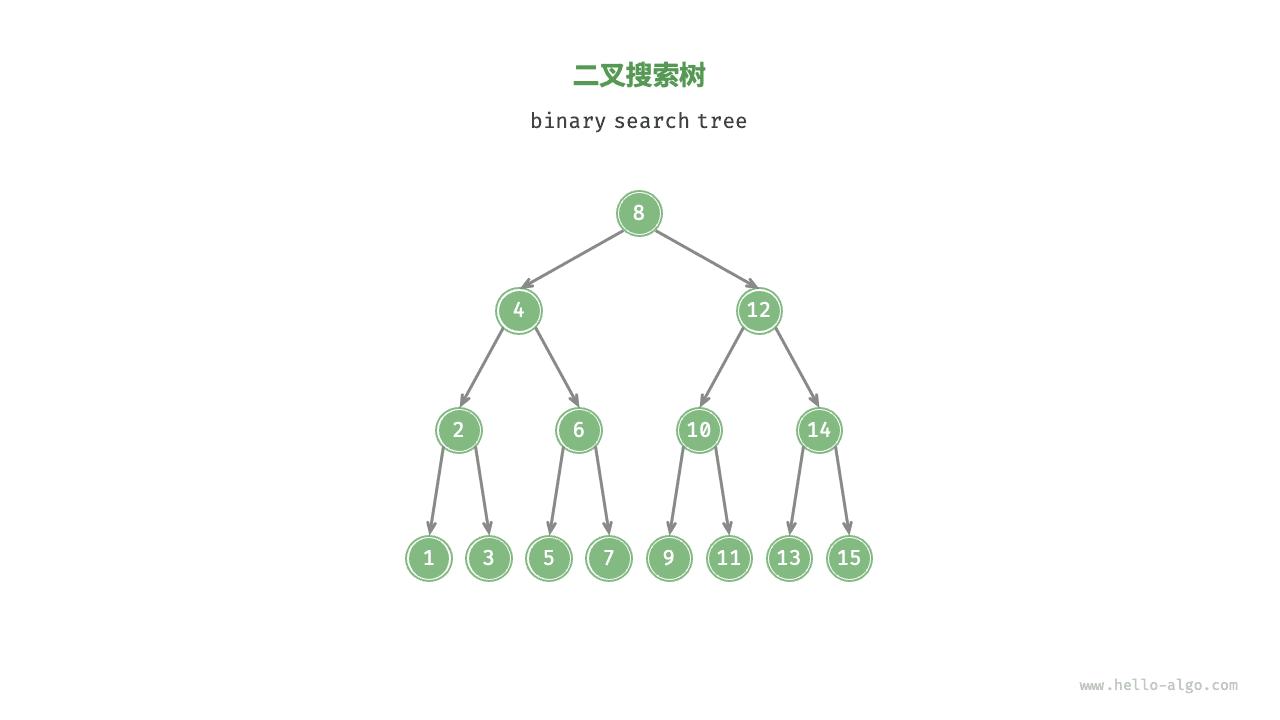

### 二叉搜索树的操作

#### 查找节点

二叉搜索树的查找操作与二分查找一致, 每轮排除一半, 循环次数最多为二叉树的高度. 当二叉树平衡时, 使用 O(log n) 的时间

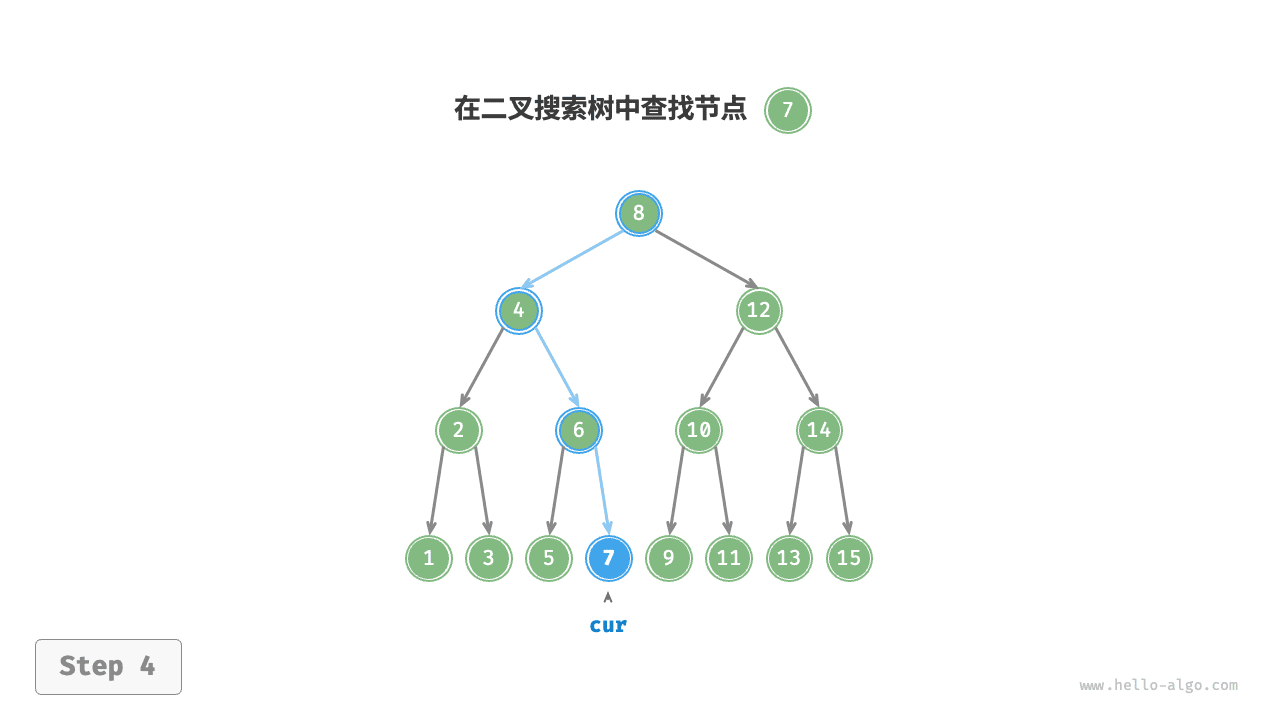

In [ ]:
def search(root: TreeNode | None, num: int) -> TreeNode | None:
    cur = root
    while cur is not None:
        # 目标节点在 cur 的右子树中
        if cur.val < num:
            cur = cur.right
        # 目标节点在 cur 的左子树中
        elif cur.val > num:
            cur = cur.left
        # 找到目标节点
        else:
            break
    return cur

#### 插入节点

需要注意的是, 二叉搜索树不允许存在重复的节点, 否则违反定义  
O(log n)

In [3]:
def insert(root: TreeNode | None, num: int):
    # 如果为空, 不操作
    if root is None:
        return
    # 循环查找
    cur, pre = root, None
    while cur is not None:
        # 已存在则返回
        if cur.val == num:
            return
        pre = cur
        if cur.val < num:
            cur = cur.right
        else:
            cur = cur.left
    # 插入节点
    node = TreeNode(num)
    if pre.val < num:
        pre.right = node
    else:
        pre.left = node
    return

#### 删除节点

删除节点时, 按节点的度分为三种情况:
- degree = 0: 叶节点, 直接删除即可
- degree = 1: 将待删除节点替换为子节点即可
- degree = 2: 该情况需要保证结果满足二叉搜索树定义, 因此需要选择一个节点来替换待删除节点. 我们可以选择右子树的最小节点或左子树的最大节点

O(log n)

In [6]:
def remove(root: TreeNode | None, num: int):
    if root is None:
        return
    # 循环查找
    cur, pre = root, None
    while cur is not None:
        # 找到待删除节点, 跳出循环
        if cur.val == num:
            break
        pre = cur
        # 待删除节点在 cur 的右子树中
        if cur.val < num:
            cur = cur.right
        # 待删除节点在 cur 的左子树中
        else:
            cur = cur.left
    
    # 若无待删除节点, 直接返回
    if cur is None:
        return
    
    # degree = 0 or 1
    if cur.left is None or cur.right is None:
        # or 操作符 -> A or B
        # 若 A 为真值, 返回 A
        # 若 A 为假值, 返回 B
        # 如果需要 bool 型结果, 需要手动转换
        child = cur.left or cur.right
        # 删除节点 cur
        if cur != root:
            if pre.left == cur:
                pre.left = child
            else:
                pre.right = child
        else:
            # 如果需要删除根节点, 直接不管
            pass
    # degree = 2
    else:
        # 查找右子树最小值
        tmp: TreeNode = cur.right
        while tmp.left is not None:
            tmp = tmp.left
        # 删除 tmp, 这个写法不太好, 但这是教学代码
        remove(tmp.val)
        # 用 tmp 覆盖 cur
        cur.val = tmp.val
    
    return        

#### 中序遍历有序

二叉树的中序遍历遵循"左 -> 根 -> 右"的顺序, 而二叉搜索树又恰好满足"左 < 根 < 右"的大小关系.  
因此, 二叉搜索树的中序遍历的结果是升序的  

利用中序遍历的升序性质, 从二叉搜索树中获取有序数据仅需 O(n) 的时间, 非常高效.

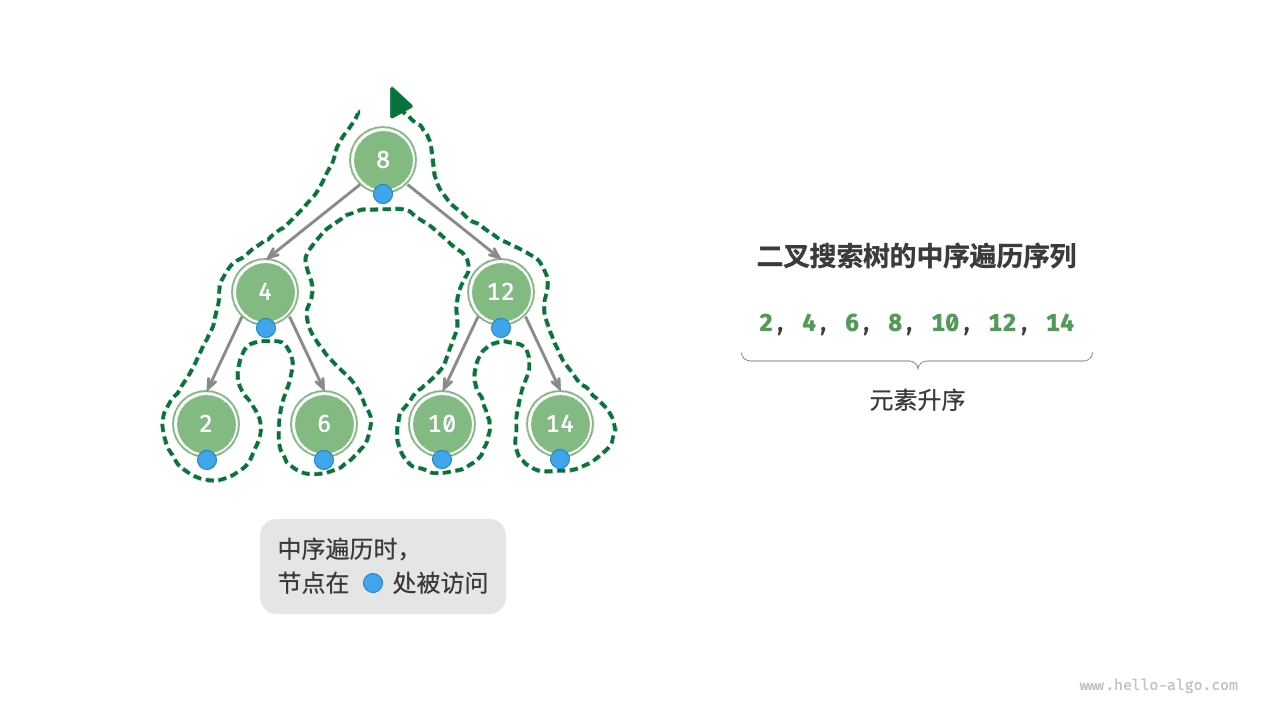

二叉搜索树各项操作的时间复杂度都是 O(log n), 具有搞笑的性能.  
只有在高频添加, 低频查删的场景下, 数组比二叉搜索树效率更高.

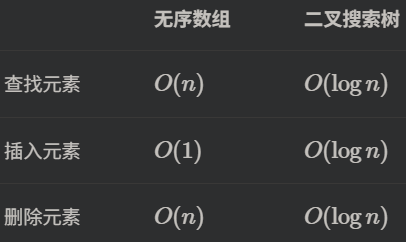

理想状态下, 二叉搜索树是平衡的, 然而, 如果在其中不断的插入和删除节点, 很可能导致其退化为链表, 即从 O(log n) -> O(n)

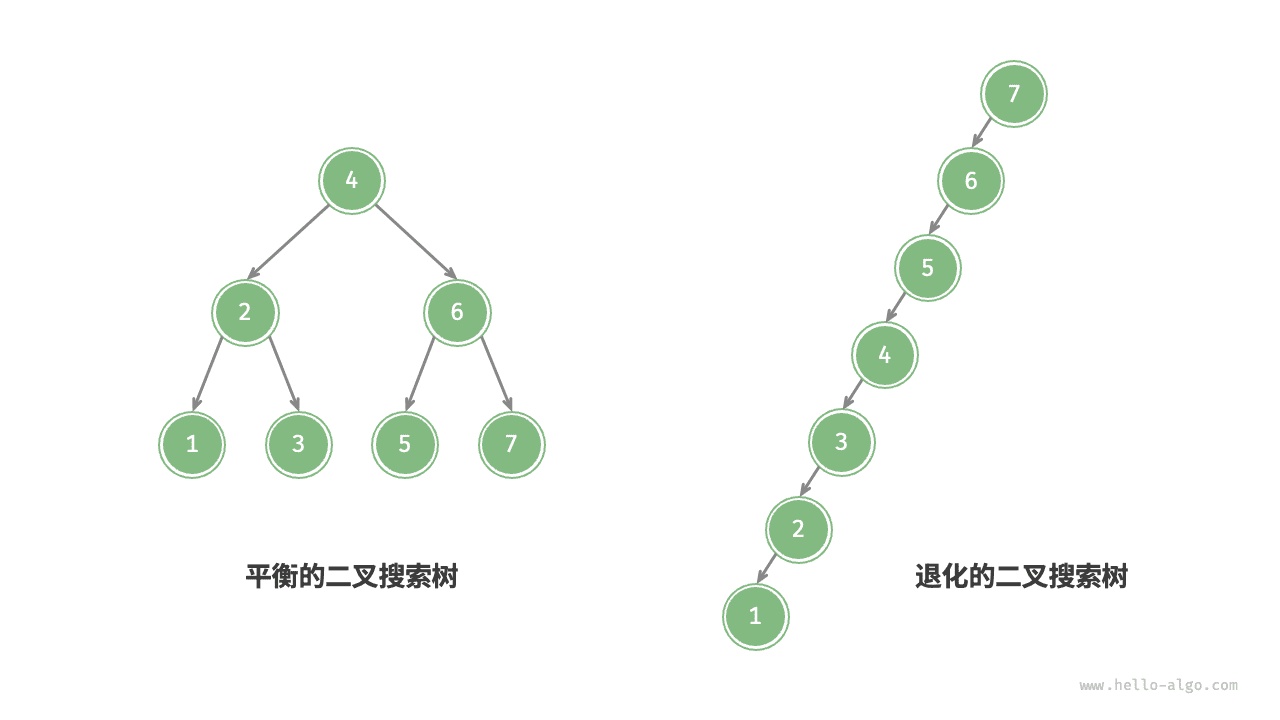

## AVL树

AVL树既是二叉搜索树, 也是平衡二叉树. 即平衡二叉搜索树(balanced binary search tree)

节点高度: 该节点到最远叶节点的距离(所经过的边数). 叶节点高度为 0, 空节点高度为 -1  
节点平衡因子(balance factor): 左子树高度 - 右子树高度. 空节点平衡因子为 0  

设平衡因子为 f, 则一颗 AVL树 的任意节点的平衡因子皆满足 -1 <= f <= 1

### AVL树旋转

AVL树的特点在于"旋转"操作, 它能够在不影响二叉树中序遍历的前提下, 使失衡节点恢复平衡.  
其既能保持"二叉搜索树"的性质, 也能使得树重新变为"平衡二叉树"

我们将 |平衡因子| > 1 的节点称为"失衡节点".  
根据失衡情况不同, 旋转操作分为四种:
1. 右旋
2. 左旋
3. 先右旋后左旋
4. 先左旋后右旋

#### 右旋

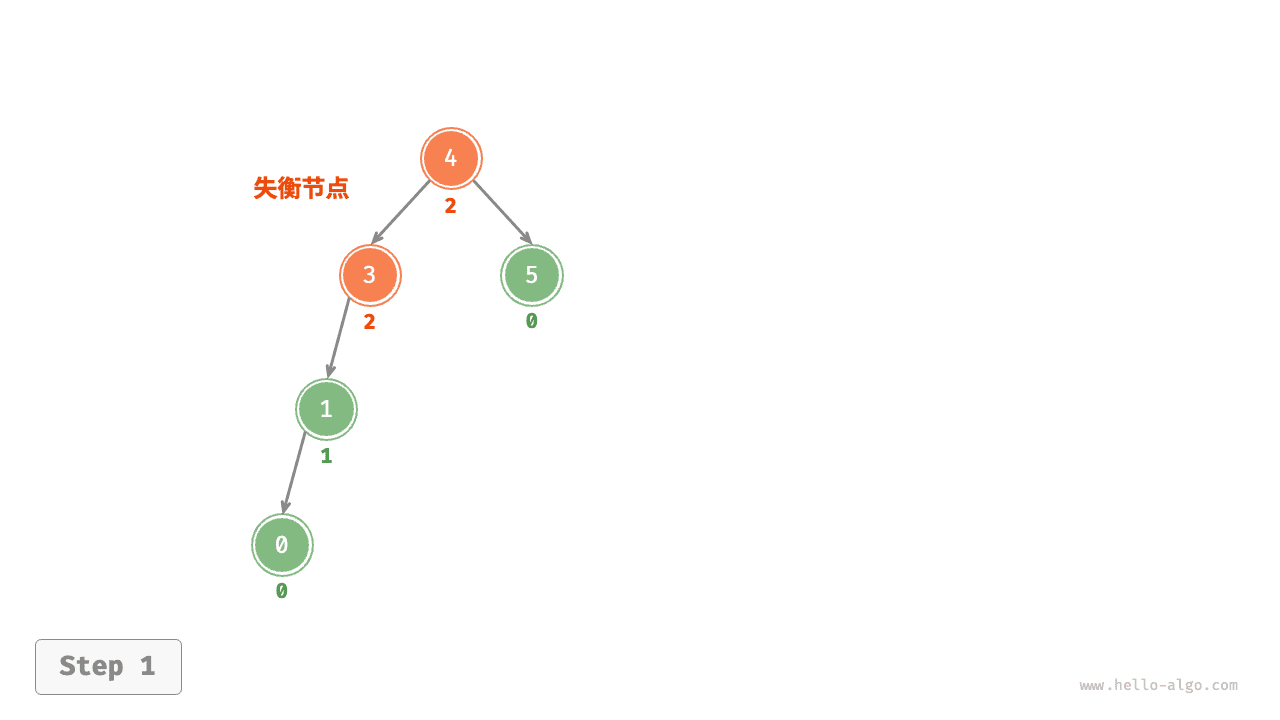
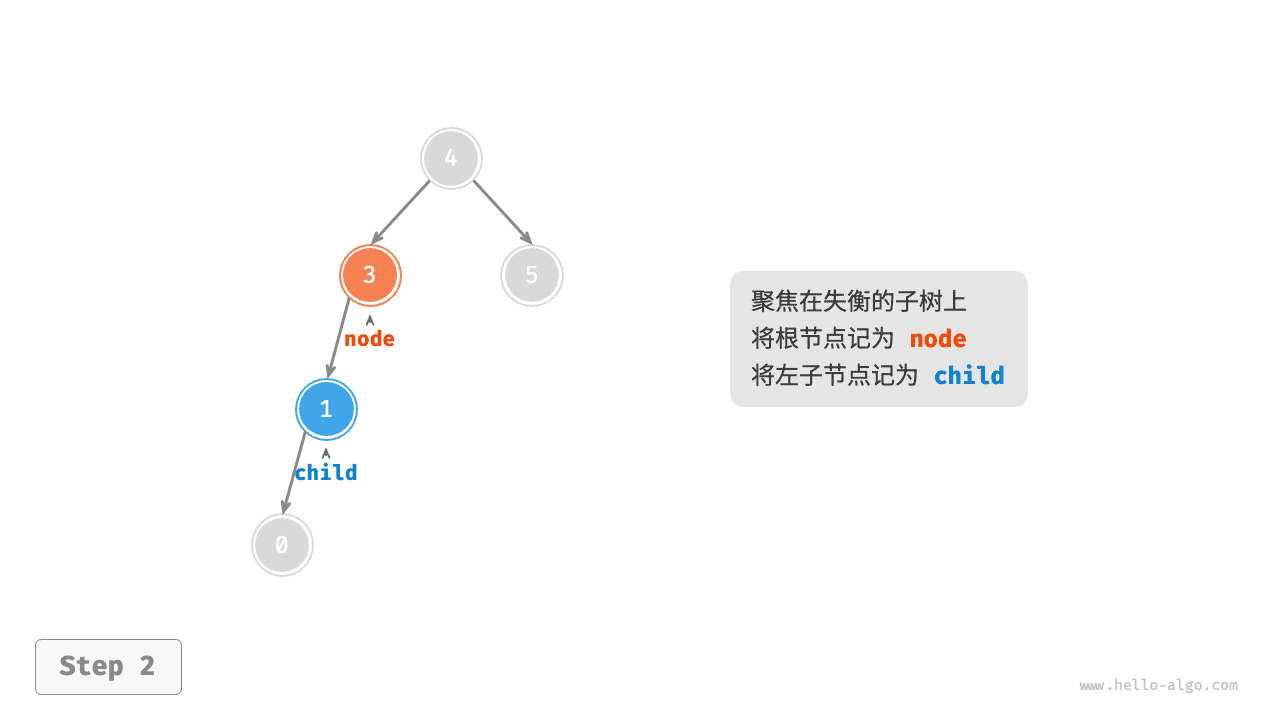
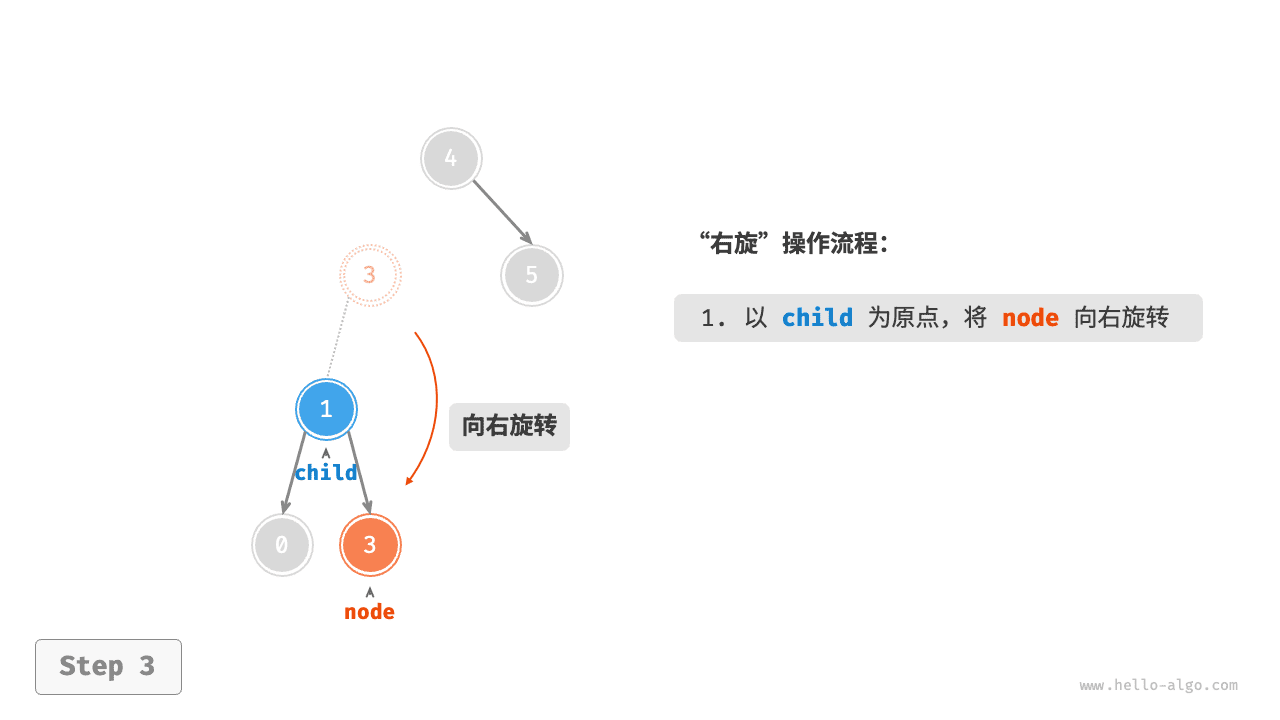
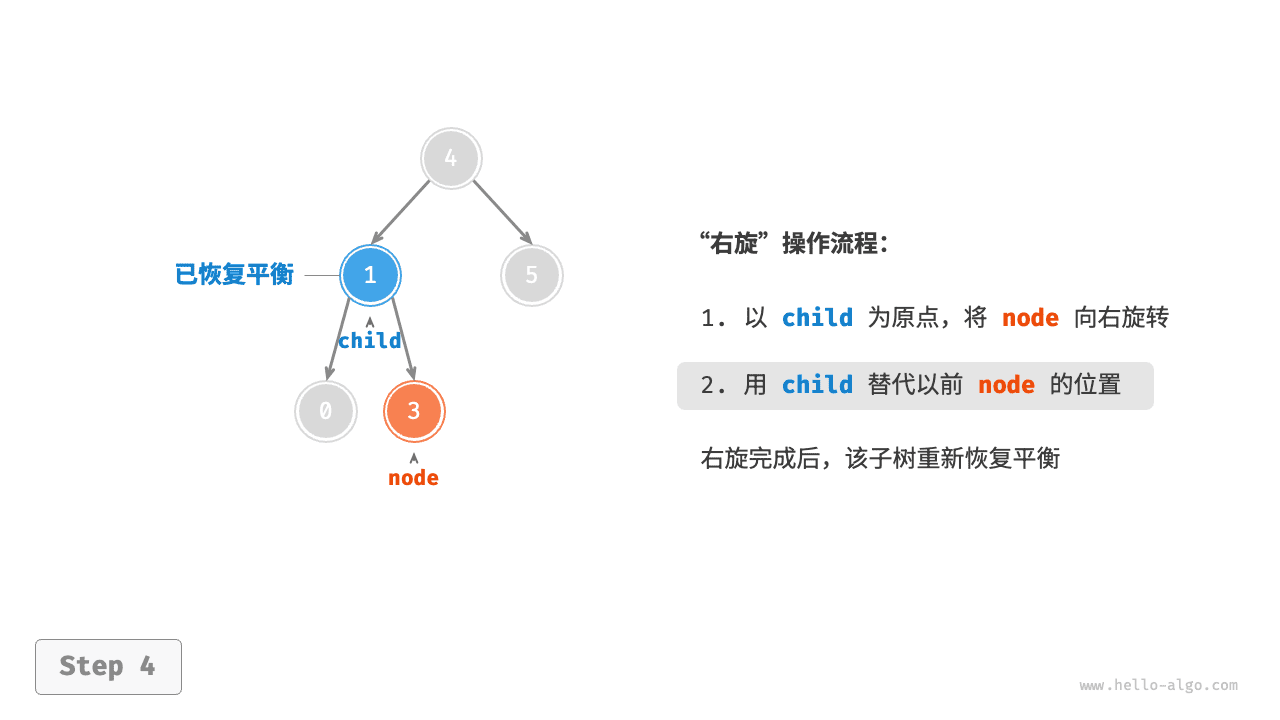

当节点 child 有右子节点时, 需在右旋中添加一步. 将 grand_child 作为 node 的左子节点.
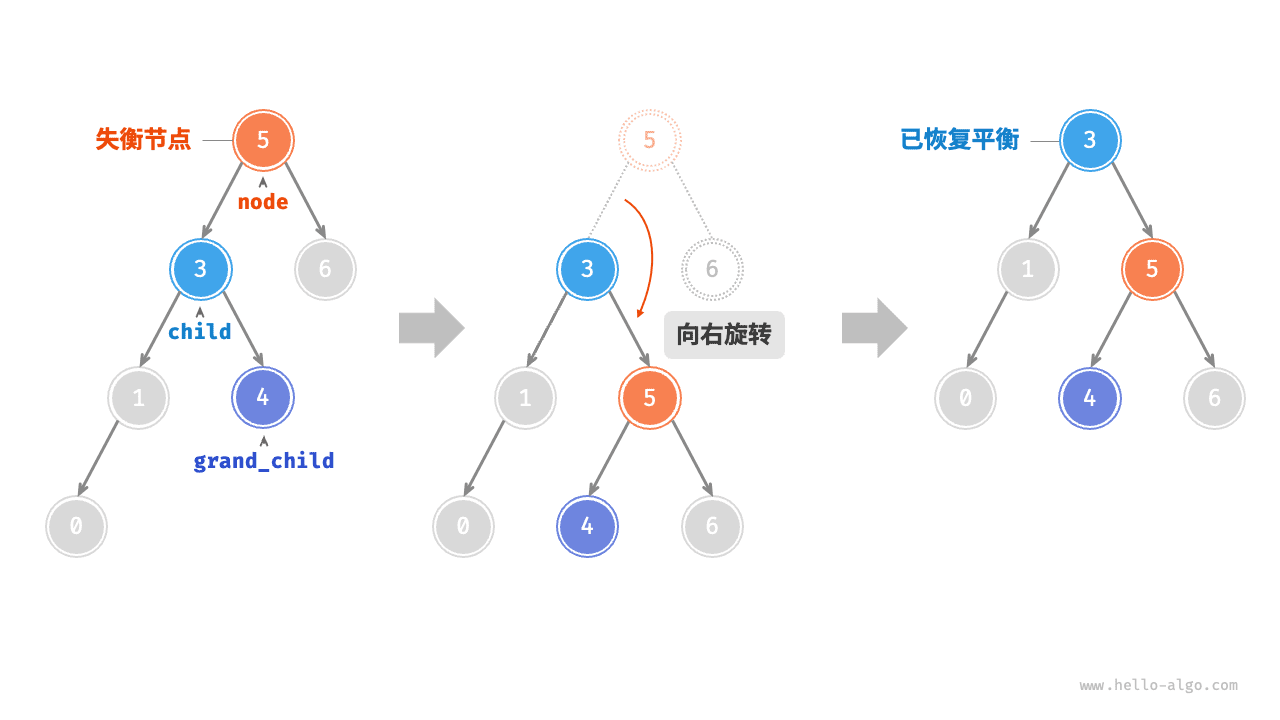

#### 左旋

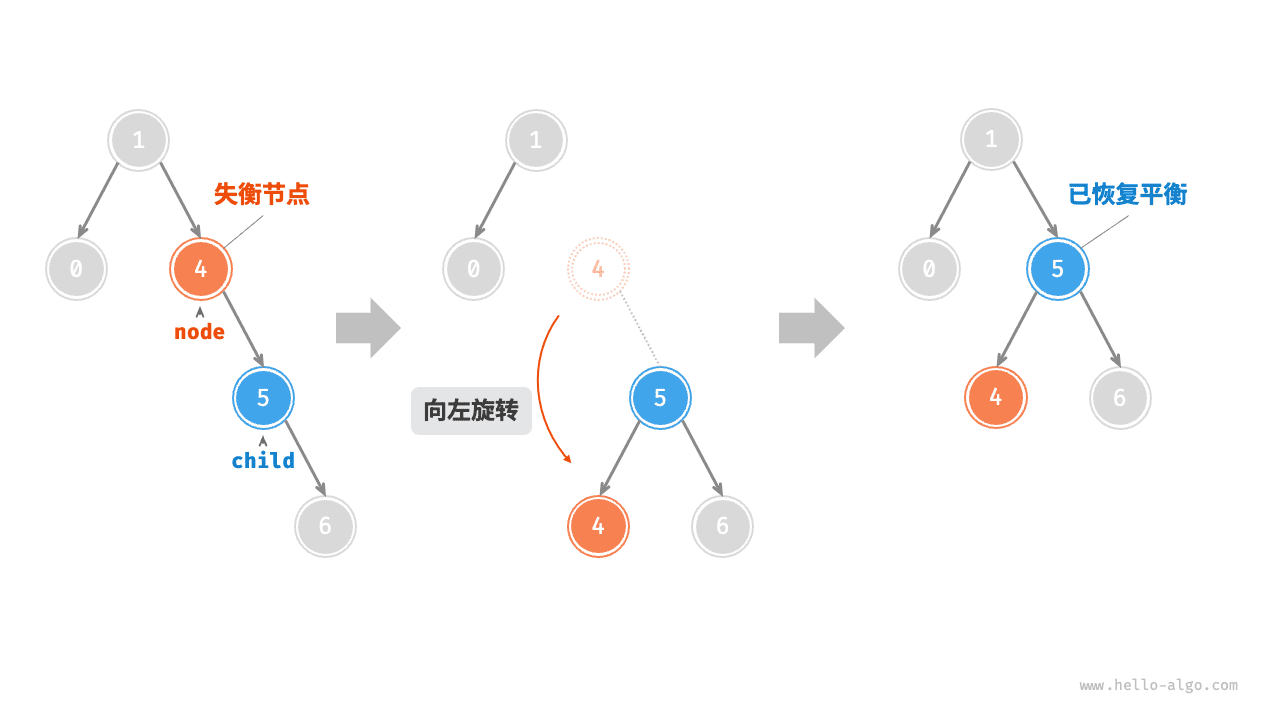
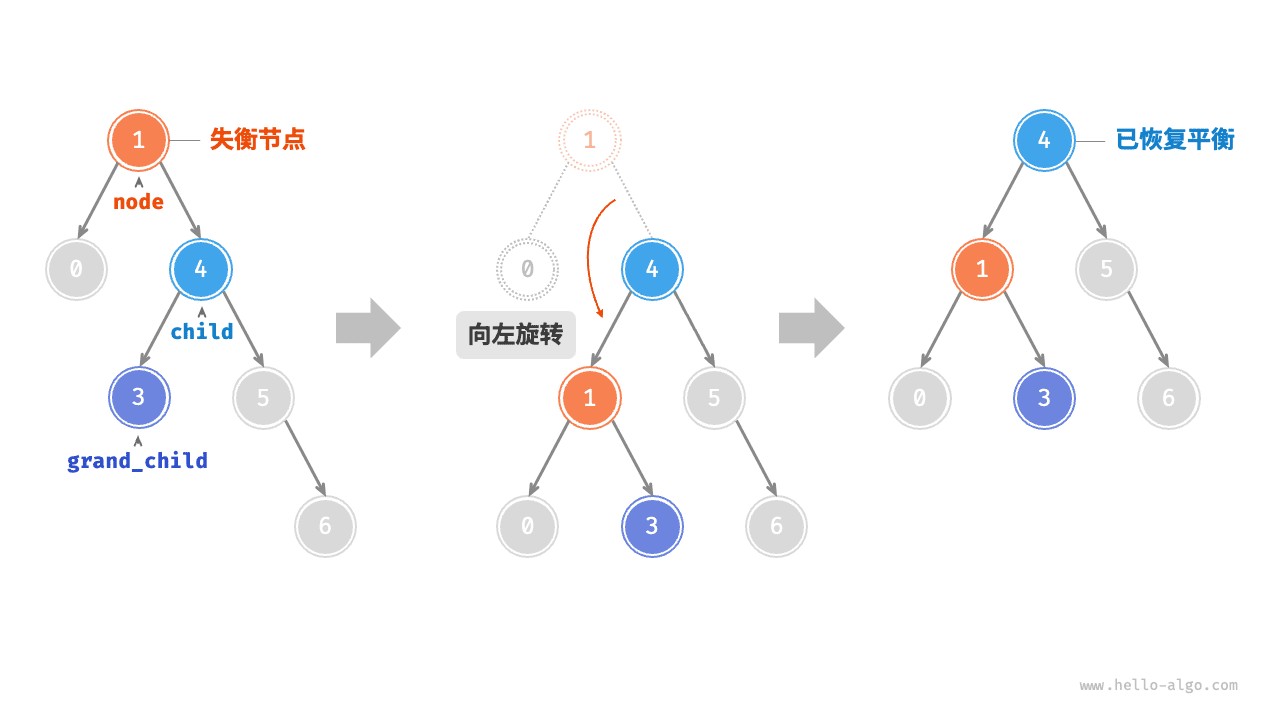

在左旋操作时, 当 child 有左子节点时, 需要在左旋中添加一步: 将 grand_child 作为 node 的右子节点

#### 先左旋后右旋

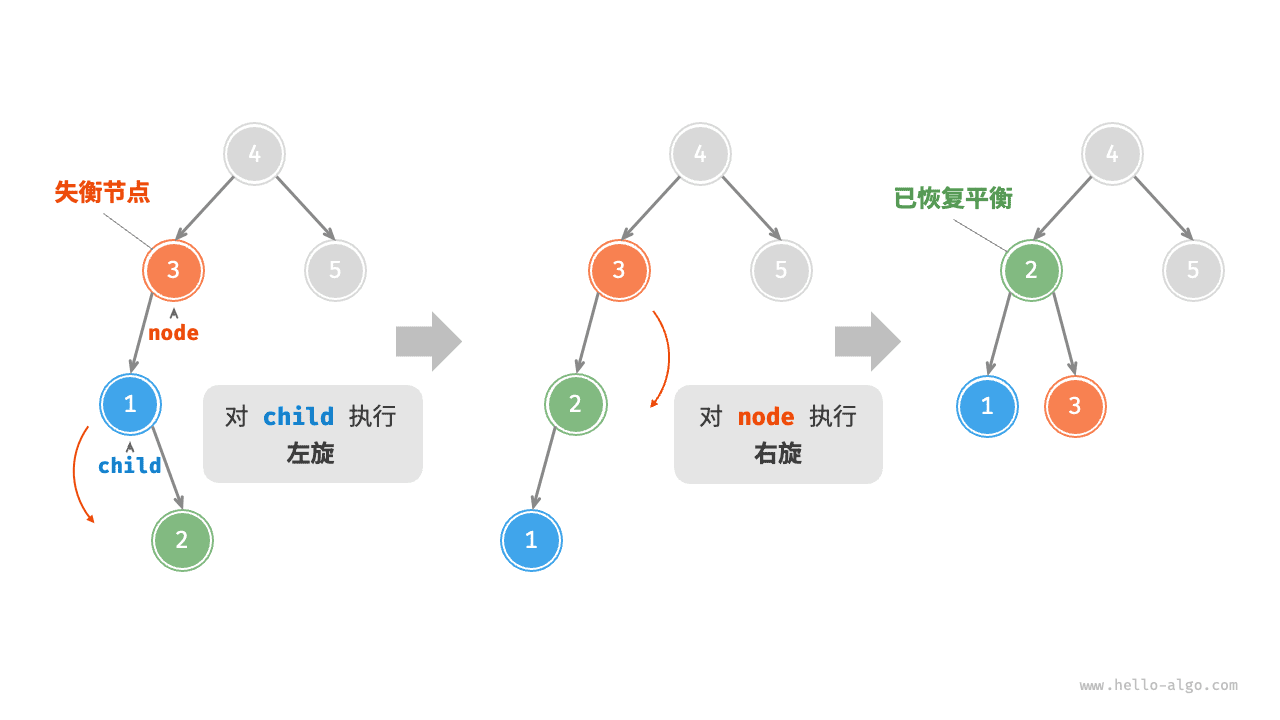

#### 先右旋后左旋

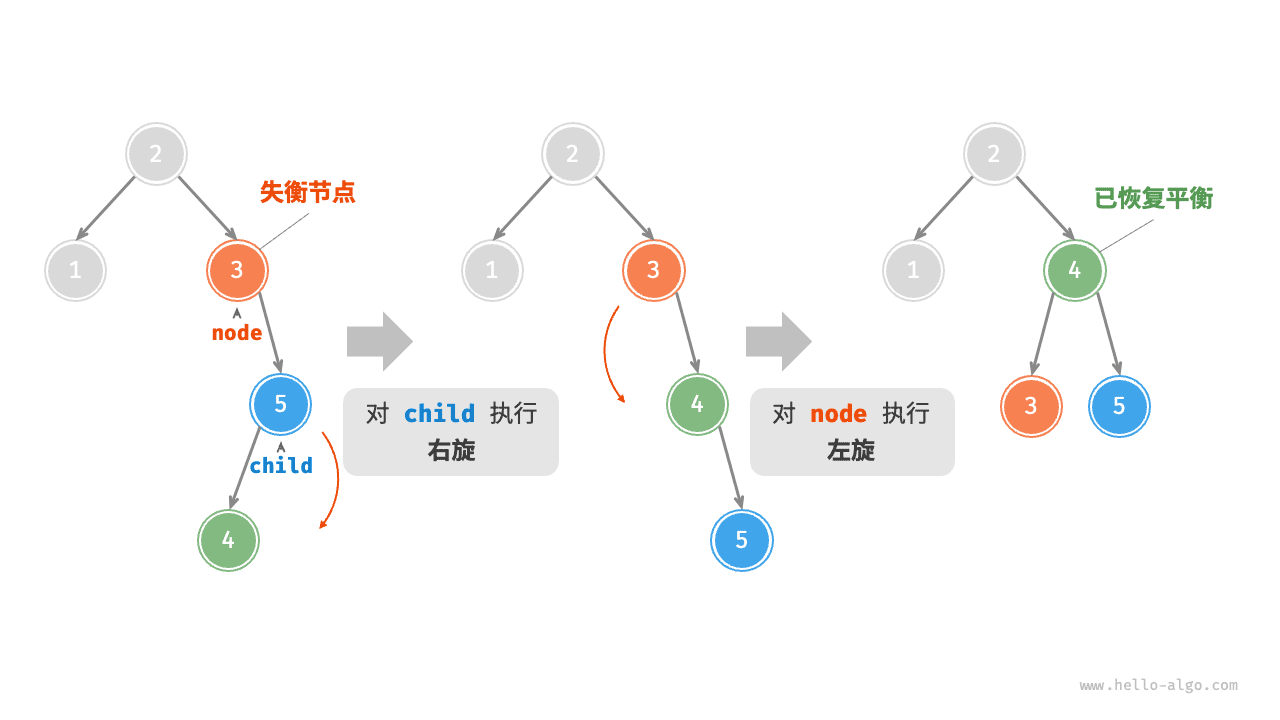

#### 旋转的选择

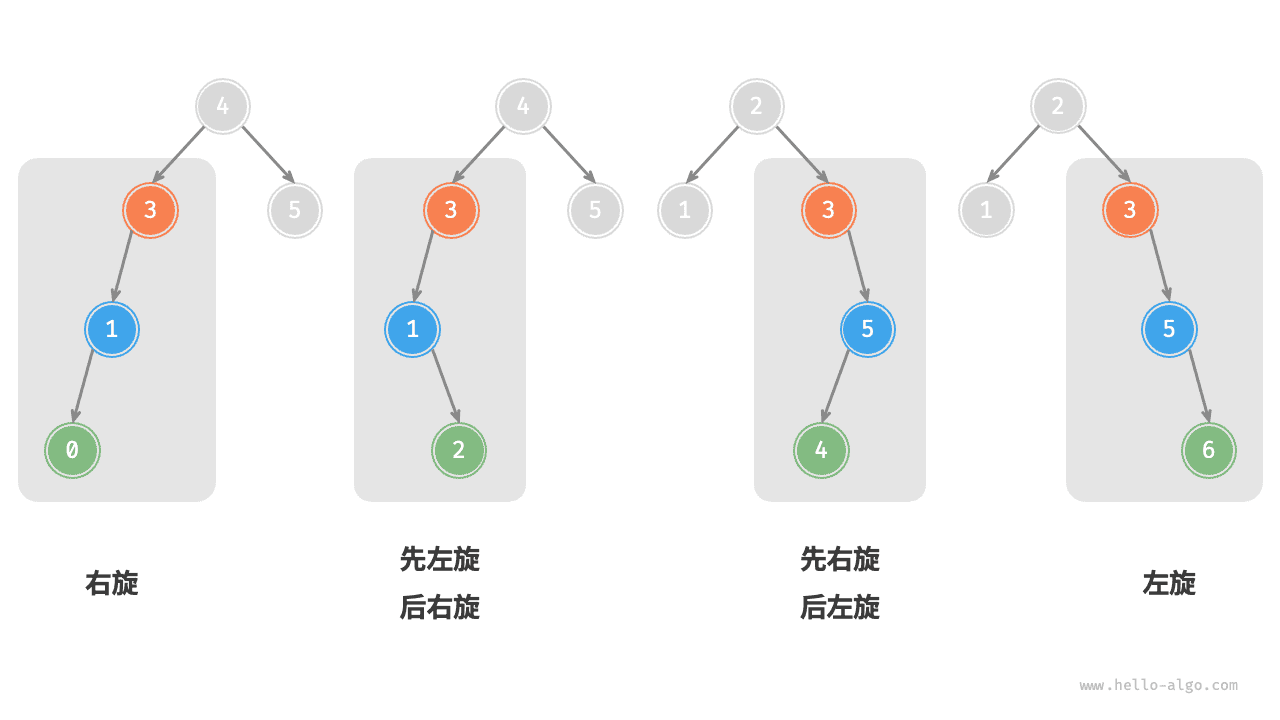

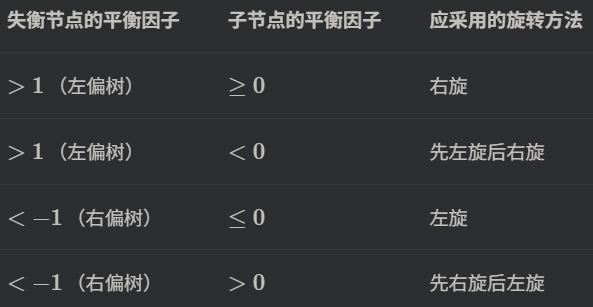

### AVL树常用操作

- 插入节点: 与二叉搜索树在主体上类似, 唯一的区别是, 插入节点后, 从该节点到根节点的路径上可能会出现一系列失衡节点. 因此, 需要从该节点开始, 自底向上执行旋转操作.
- 删除节点: 同上
- 查找节点: 略

AVL树适合高频查找, 低频增删的场景

红黑树也是一种常见的平衡二叉搜索树, 只不过其平衡条件更宽松, 插入与删除时旋转更少. 平均效率更高.

### 代码实现

In [9]:
class TreeNode:
    def __init__(self, val: int):
        self.val: int = val
        self.height: int = 0
        self.left: TreeNode | None = None
        self.right: TreeNode | None = None

class AVLTree:
    
    def __init__(self):
        self._root = None

    def get_root(self) -> TreeNode | None:
        return self._root

    def height(self, node: TreeNode | None) -> int:
        # 空节点高度 -1, 叶节点高度 0
        if node is not None:
            return node.height
        return -1

    def update_height(self, node: TreeNode | None):
        # 节点高度等于最高子树高度 +1
        node.height = max([self.height(node.left), self.height(node.right)]) + 1

    def balance_factor(self, node: TreeNode | None) -> int:
        # 空节点平衡因子为0
        if node is None:
            return 0
        # 节点平衡因子 = 左子树高度 - 右子树高度
        return self.height(node.left) - self.height(node.right)

    def right_rotate(self, node: TreeNode | None) -> TreeNode | None:
        child = node.left
        grand_child = child.right
        # 以 child 为远点, 将 node 向右旋转
        child.right = node
        node.left = grand_child
        # 更新节点高度
        self.update_height(node)
        self.update_height(child)
        # 返回旋转后的根节点
        return child

    def left_rotate(self, node: TreeNode | None) -> TreeNode | None:
        child = node.right
        grand_child = child.left
        # 以 child 为原点, 将 node 向左旋转
        child.left = node
        node.right = grand_child
        # 更新节点高度
        self.update_height(node)
        self.update_height(node)
        # 返回旋转后的根节点
        return child

    def rotate(self, node: TreeNode | None) -> TreeNode | None:
        # 获取 node 的平衡因子
        balance_factor = self.balance_factor(node)
        # 左偏树
        if balance_factor > 1:
            if self.balance_factor(node.left) >= 0:
                # 右旋
                return self.right_rotate(node)
            else:
                # 先左旋后右旋
                node.left = self.left_rotate(node.left)
                return self.right_rotate(node)
        # 右偏树
        elif balance_factor < -1:
            if self.balance_factor(node.right) <= 0:
                # 左旋
                return self.left_rotate
            else:
                # 先右旋后左旋
                node.right = self.right_rotate(node.right)
                return self.left_rotate(node)
        # 平衡树, 无需旋转
        return node

    def insert(self, val):
        
                
        
        